# Telecom Churn Case Study
## Customers Churn Prediction
---

## Problem Statement
---

Build ML models to predict churn:
- Predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc
- Identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks. A good choice to identify important variables is a logistic regression model or a model from the tree family.
- Overall accuracy will be primary evaluation metric.
- Metrics like precision, recall, etc for different models should be calculated
- Build a ML model that identifies customers who'll definitely churn with more accuracy as compared to the ones who'll not churn. Find which metric can be used in such scenarios.
- Recommend strategies to manage customer churn based on the observations.
- Try using a dimensionality reduction technique such as PCA and then build a predictive model.
- Use additional techniques like Class Imbalance handling, Boosting, etc to improve accuracy.

## Steps
---

- Data Understanding, Preparation, and Pre-Processing:
 - Data understanding, identification of potentially useful and non-useful attributes and variable importance and impact estimation
 - Data preparation, performing data cleaning, missing values imputation, outlier removal, and column level standardization (for e.g., date, etc.) into one format

- Exploratory Data Analysis:
 - Performing basic preliminary data analysis including finding the correlation between variables and scatter plots to identify relationships between variables
 - Performing advanced data analysis, including plotting relevant heatmaps, histograms, and basic clustering to find patterns in the data
 
- Feature Engineering and Variable Transformation:
 - Feature engineering and performing one or more methods on attributes that can lead to the creation of a new potentially useful variable; for e.g., day from the date
 - Variable transformation and applying categorical variable transformations to turn into numerical data and numerical variable transformations to scale data
 
- Model Selection, Model Building, and  Prediction:
 - Identifying the type of problem and making a list of decisive models from all available choices
 - Choosing a training mechanism; for e.g., cross-validation, etc., and tuning hyperparameters of each model
 - Testing each model on the respective model evaluation metric
 - Choosing the best model based on the fit of the data set and output variable
 - Using ensemble options to improve the efficacy based on the evaluation metric stated in the problem
 
- Final Recommendations

### Data understanding, preparation and pre-processing

In [1]:
# Import required python libraries to work with CSV file and plot basic graphs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ignore warnings while working with various libraries
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Load given dataset day.csv file in dataset variable
dataset = pd.read_csv("train.csv")
dataset.head()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
0,0,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,31.277,87.009,...,0,0,NaN,NaN,NaN,1958,0.0,0.0,0.0,0
1,1,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,0.000,122.787,...,0,0,NaN,1.0,NaN,710,0.0,0.0,0.0,0
2,2,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,60.806,103.176,...,0,0,NaN,NaN,NaN,882,0.0,0.0,0.0,0
3,3,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,156.362,205.260,...,0,0,NaN,NaN,NaN,982,0.0,0.0,0.0,0
4,4,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,240.708,128.191,...,1,0,1.0,1.0,1.0,647,0.0,0.0,0.0,0


In [3]:
# Get basic information about dataset
dataset.shape

(69999, 172)

In [4]:
# Get basic information about dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Columns: 172 entries, id to churn_probability
dtypes: float64(135), int64(28), object(9)
memory usage: 91.9+ MB


In [5]:
# Get basic information about dataset
dataset.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 172 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    id                        int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    arpu_6                    float64
 9    arpu_7                    float64
 10   arpu_8                    float64
 11   onnet_mou_6               float64
 12   onnet_mou_7               float64
 13   onnet_mou_8               float64
 14   offnet_mou_6              float64
 15   offnet_mou_7              float64
 16   offnet_mou_8              float64
 17   roam_ic_mou_6             float64
 18   roam_ic_mou_7             float64
 19   roam_ic_mou_8             float64
 20   roam

In [6]:
# Get basic information about dataset
dataset.describe()

,id,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,...,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn_probability
count,69999.000000,69999.0,69297.0,69297.0,69297.0,69999.000000,69999.000000,69999.000000,67231.000000,67312.000000,...,69999.000000,69999.000000,17568.000000,17865.000000,18417.000000,69999.000000,69999.000000,69999.000000,69999.00000,69999.000000
mean,34999.000000,109.0,0.0,0.0,0.0,283.134365,278.185912,278.858826,133.153275,133.894438,...,0.081444,0.085487,0.916325,0.909544,0.890319,1220.639709,68.108597,65.935830,60.07674,0.101887
std,20207.115084,0.0,0.0,0.0,0.0,334.213918,344.366927,351.924315,299.963093,311.277193,...,0.634547,0.680035,0.276907,0.286842,0.312501,952.426321,269.328659,267.899034,257.22681,0.302502
min,0.000000,109.0,0.0,0.0,0.0,-2258.709000,-1289.715000,-945.808000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.00000,0.000000
25%,17499.500000,109.0,0.0,0.0,0.0,93.581000,86.714000,84.095000,7.410000,6.675000,...,0.000000,0.000000,1.000000,1.000000,1.000000,468.000000,0.000000,0.000000,0.00000,0.000000
50%,34999.000000,109.0,0.0,0.0,0.0,197.484000,191.588000,192.234000,34.110000,32.280000,...,0.000000,0.000000,1.000000,1.000000,1.000000,868.000000,0.000000,0.000000,0.00000,0.000000
75%,52498.500000,109.0,0.0,0.0,0.0,370.791000,365.369500,369.909000,119.390000,115.837500,...,0.000000,0.000000,1.000000,1.000000,1.000000,1813.000000,0.000000,0.000000,0.00000,0.000000
max,69998.000000,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,...,33.000000,41.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.21000,1.000000


#### Data Cleaning

In [7]:
# Keep track of all dropped columns in a single varible
columns_dropped = []

In [8]:
# Drop irrelevant columns that will not affect the telecom churn
# Id - this is an index column

column_names_irrelevant = ['id']
dataset.drop(column_names_irrelevant, axis = 1, inplace=True)

columns_dropped += column_names_irrelevant

dataset.shape

(69999, 171)

#### Drop Duplicates

In [9]:
# Drop duplicate data

print('Dataset Share before dropping duplicates:', dataset.shape)
dataset.drop_duplicates(inplace=True)
print('Dataset Share after dropping duplicates:', dataset.shape)

Dataset Share before dropping duplicates: (69999, 171)
Dataset Share after dropping duplicates: (69999, 171)


#### Find columns with unique values

In [10]:
dataset.nunique().sort_values(ascending = True).head(20)

circle_id               1
std_ic_t2o_mou_8        1
std_ic_t2o_mou_7        1
std_og_t2c_mou_8        1
std_og_t2c_mou_7        1
std_og_t2c_mou_6        1
std_ic_t2o_mou_6        1
last_date_of_month_7    1
last_date_of_month_8    1
loc_og_t2o_mou          1
std_og_t2o_mou          1
last_date_of_month_6    1
loc_ic_t2o_mou          1
churn_probability       2
night_pck_user_8        2
fb_user_8               2
fb_user_7               2
fb_user_6               2
night_pck_user_7        2
night_pck_user_6        2
dtype: int64

In [11]:
# Drop columns will all values unique (unique count = 1)
# If all values in a column are same, that will not add any value to the predictive model
# So these can be dropped

column_names_with_all_values_same = []

for col in dataset.columns:
    unique_values_in_col = dataset[col].nunique()
    if(unique_values_in_col == 1):
        column_names_with_all_values_same += [col]

print('Columns to drop: ', column_names_with_all_values_same)

dataset.drop(column_names_with_all_values_same, axis = 1, inplace=True)

columns_dropped += column_names_with_all_values_same

dataset.shape

Columns to drop:  ['circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8']


(69999, 158)

Columns where all values were same are dropped now.

#### Date related columns

In [12]:
# we do not need date related columns for this analysis
# So Date columns can be dropped

date_columns = list(filter(lambda col_name: 'date' in col_name, dataset.columns.tolist()))

print('Columns to drop: ', date_columns)

dataset.drop(date_columns, axis = 1, inplace=True)

columns_dropped += date_columns

dataset.shape

Columns to drop:  ['date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8']


(69999, 152)

#### Handling null values

In [13]:
# Find percentage of total data missing

total_values = dataset.shape[0] * dataset.shape[1]
null_values = dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  15.53 %


[]

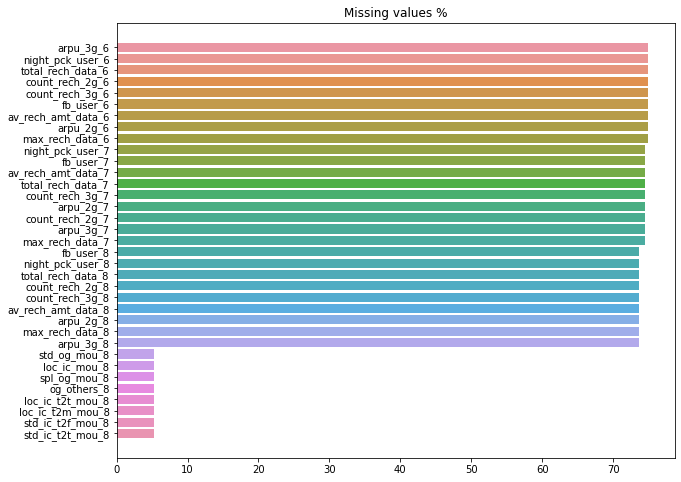

In [14]:
# Find percentage of null values in each column
missing_vals_percent = (dataset.isnull().sum() / dataset.shape[0] * 100).sort_values(ascending = False).head(35)

plt.figure(figsize = (10, 8))
sns.barplot(missing_vals_percent[:] , missing_vals_percent[:].index)
plt.title('Missing values %')
plt.plot()

Many columns above have More than 75% data missing.

In [15]:
# Drop columns where more than 30% data is missing, as imputation here will create bias in data

column_names_with_more_than_30_percent_values_missing = []

for col in dataset.columns:
    missing_values_percent_in_col = dataset[col].isnull().sum() / dataset.shape[0] * 100
    if(missing_values_percent_in_col > 30):
        column_names_with_more_than_30_percent_values_missing += [col]

print('Columns to drop: ', column_names_with_more_than_30_percent_values_missing)

dataset.drop(column_names_with_more_than_30_percent_values_missing, axis = 1, inplace=True)

columns_dropped += column_names_with_more_than_30_percent_values_missing

dataset.shape

Columns to drop:  ['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


(69999, 125)

In [16]:
# Find percentage of total data missing

total_values = dataset.shape[0] * dataset.shape[1]
null_values = dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  2.83 %


#### Missing values Imputation

__We only have 2.83 % missing data. Here our options are:__
- __We can drop the rows with missing data__
- __We can fill missing data with mean/ median/ mode__
- __We can apply some business understanding and impute values__
- __We can use libraries like IterativeImputer or fancyImpute to fill missing data__

##### Option 1 - Can we drop rows with missing data?

In [17]:
# Looking at missing values for 6th month

june_columns = filter(lambda col_name: '_6' in col_name or 'jun' in col_name, dataset.columns.tolist())
june_columns_with_missing_values = []
for col in june_columns:
    missing_vals_percent = dataset[col].isnull().sum() / dataset.shape[0] * 100
    if(missing_vals_percent > 0):
        print(col, ":", missing_vals_percent.round(2), '%')
        june_columns_with_missing_values.append(col)

onnet_mou_6 : 3.95 %
offnet_mou_6 : 3.95 %
roam_ic_mou_6 : 3.95 %
roam_og_mou_6 : 3.95 %
loc_og_t2t_mou_6 : 3.95 %
loc_og_t2m_mou_6 : 3.95 %
loc_og_t2f_mou_6 : 3.95 %
loc_og_t2c_mou_6 : 3.95 %
loc_og_mou_6 : 3.95 %
std_og_t2t_mou_6 : 3.95 %
std_og_t2m_mou_6 : 3.95 %
std_og_t2f_mou_6 : 3.95 %
std_og_mou_6 : 3.95 %
isd_og_mou_6 : 3.95 %
spl_og_mou_6 : 3.95 %
og_others_6 : 3.95 %
loc_ic_t2t_mou_6 : 3.95 %
loc_ic_t2m_mou_6 : 3.95 %
loc_ic_t2f_mou_6 : 3.95 %
loc_ic_mou_6 : 3.95 %
std_ic_t2t_mou_6 : 3.95 %
std_ic_t2m_mou_6 : 3.95 %
std_ic_t2f_mou_6 : 3.95 %
std_ic_mou_6 : 3.95 %
spl_ic_mou_6 : 3.95 %
isd_ic_mou_6 : 3.95 %
ic_others_6 : 3.95 %


All above columns have same 3.95% values missing. 
- Most likely data for 6th month for these customers is missing, or they might be new customers started from July

lets look at rows where all June values are null

In [18]:
# Build the condition to find data rows in which all june columns are null

condition = ""
for col in june_columns_with_missing_values:
    condition += "dataset['" +col+"'].isnull()"
condition = condition.replace('.isnull()dataset', '.isnull() & dataset')
print(condition)

dataset['onnet_mou_6'].isnull() & dataset['offnet_mou_6'].isnull() & dataset['roam_ic_mou_6'].isnull() & dataset['roam_og_mou_6'].isnull() & dataset['loc_og_t2t_mou_6'].isnull() & dataset['loc_og_t2m_mou_6'].isnull() & dataset['loc_og_t2f_mou_6'].isnull() & dataset['loc_og_t2c_mou_6'].isnull() & dataset['loc_og_mou_6'].isnull() & dataset['std_og_t2t_mou_6'].isnull() & dataset['std_og_t2m_mou_6'].isnull() & dataset['std_og_t2f_mou_6'].isnull() & dataset['std_og_mou_6'].isnull() & dataset['isd_og_mou_6'].isnull() & dataset['spl_og_mou_6'].isnull() & dataset['og_others_6'].isnull() & dataset['loc_ic_t2t_mou_6'].isnull() & dataset['loc_ic_t2m_mou_6'].isnull() & dataset['loc_ic_t2f_mou_6'].isnull() & dataset['loc_ic_mou_6'].isnull() & dataset['std_ic_t2t_mou_6'].isnull() & dataset['std_ic_t2m_mou_6'].isnull() & dataset['std_ic_t2f_mou_6'].isnull() & dataset['std_ic_mou_6'].isnull() & dataset['spl_ic_mou_6'].isnull() & dataset['isd_ic_mou_6'].isnull() & dataset['ic_others_6'].isnull()


In [19]:
# Use condition built above to find number of rows
dataset[
        dataset['onnet_mou_6'].isnull() & dataset['offnet_mou_6'].isnull() & 
        dataset['roam_ic_mou_6'].isnull() & dataset['roam_og_mou_6'].isnull() & 
        dataset['loc_og_t2t_mou_6'].isnull() & dataset['loc_og_t2m_mou_6'].isnull() & 
        dataset['loc_og_t2f_mou_6'].isnull() & dataset['loc_og_t2c_mou_6'].isnull() & 
        dataset['loc_og_mou_6'].isnull() & dataset['std_og_t2t_mou_6'].isnull() & 
        dataset['std_og_t2m_mou_6'].isnull() & dataset['std_og_t2f_mou_6'].isnull() & 
        dataset['std_og_mou_6'].isnull() & dataset['isd_og_mou_6'].isnull() & 
        dataset['spl_og_mou_6'].isnull() & dataset['og_others_6'].isnull() & 
        dataset['loc_ic_t2t_mou_6'].isnull() & dataset['loc_ic_t2m_mou_6'].isnull() & 
        dataset['loc_ic_t2f_mou_6'].isnull() & dataset['loc_ic_mou_6'].isnull() & 
        dataset['std_ic_t2t_mou_6'].isnull() & dataset['std_ic_t2m_mou_6'].isnull() & 
        dataset['std_ic_t2f_mou_6'].isnull() & dataset['std_ic_mou_6'].isnull() & 
        dataset['spl_ic_mou_6'].isnull() & dataset['isd_ic_mou_6'].isnull() & 
        dataset['ic_others_6'].isnull()
].shape

(2768, 125)

There are 2768 rows where all june values are missing. Performing similar analysis for July and August data rows

In [20]:
# Looking at missing values for 7th month

july_columns = list(filter(lambda col_name: '_7' in col_name or 'jul' in col_name, dataset.columns.tolist()))
july_columns_with_missing_values = []
for col in july_columns:
    missing_vals_percent = dataset[col].isnull().sum() / dataset.shape[0] * 100
    if(missing_vals_percent > 0):
        july_columns_with_missing_values.append(col)
        print(col, ':', missing_vals_percent.round(2), '%')

onnet_mou_7 : 3.84 %
offnet_mou_7 : 3.84 %
roam_ic_mou_7 : 3.84 %
roam_og_mou_7 : 3.84 %
loc_og_t2t_mou_7 : 3.84 %
loc_og_t2m_mou_7 : 3.84 %
loc_og_t2f_mou_7 : 3.84 %
loc_og_t2c_mou_7 : 3.84 %
loc_og_mou_7 : 3.84 %
std_og_t2t_mou_7 : 3.84 %
std_og_t2m_mou_7 : 3.84 %
std_og_t2f_mou_7 : 3.84 %
std_og_mou_7 : 3.84 %
isd_og_mou_7 : 3.84 %
spl_og_mou_7 : 3.84 %
og_others_7 : 3.84 %
loc_ic_t2t_mou_7 : 3.84 %
loc_ic_t2m_mou_7 : 3.84 %
loc_ic_t2f_mou_7 : 3.84 %
loc_ic_mou_7 : 3.84 %
std_ic_t2t_mou_7 : 3.84 %
std_ic_t2m_mou_7 : 3.84 %
std_ic_t2f_mou_7 : 3.84 %
std_ic_mou_7 : 3.84 %
spl_ic_mou_7 : 3.84 %
isd_ic_mou_7 : 3.84 %
ic_others_7 : 3.84 %


In [21]:
# Build the condition to find data rows in which all july columns are null

condition = ""
for col in july_columns_with_missing_values:
    condition += "dataset['" +col+"'].isnull()"
condition = condition.replace('.isnull()dataset', '.isnull() & dataset')
print(condition)

dataset['onnet_mou_7'].isnull() & dataset['offnet_mou_7'].isnull() & dataset['roam_ic_mou_7'].isnull() & dataset['roam_og_mou_7'].isnull() & dataset['loc_og_t2t_mou_7'].isnull() & dataset['loc_og_t2m_mou_7'].isnull() & dataset['loc_og_t2f_mou_7'].isnull() & dataset['loc_og_t2c_mou_7'].isnull() & dataset['loc_og_mou_7'].isnull() & dataset['std_og_t2t_mou_7'].isnull() & dataset['std_og_t2m_mou_7'].isnull() & dataset['std_og_t2f_mou_7'].isnull() & dataset['std_og_mou_7'].isnull() & dataset['isd_og_mou_7'].isnull() & dataset['spl_og_mou_7'].isnull() & dataset['og_others_7'].isnull() & dataset['loc_ic_t2t_mou_7'].isnull() & dataset['loc_ic_t2m_mou_7'].isnull() & dataset['loc_ic_t2f_mou_7'].isnull() & dataset['loc_ic_mou_7'].isnull() & dataset['std_ic_t2t_mou_7'].isnull() & dataset['std_ic_t2m_mou_7'].isnull() & dataset['std_ic_t2f_mou_7'].isnull() & dataset['std_ic_mou_7'].isnull() & dataset['spl_ic_mou_7'].isnull() & dataset['isd_ic_mou_7'].isnull() & dataset['ic_others_7'].isnull()


In [22]:
# Use condition built above to find number of rows
dataset[
        dataset['onnet_mou_7'].isnull() & dataset['offnet_mou_7'].isnull() & 
        dataset['roam_ic_mou_7'].isnull() & dataset['roam_og_mou_7'].isnull() & 
        dataset['loc_og_t2t_mou_7'].isnull() & dataset['loc_og_t2m_mou_7'].isnull() & 
        dataset['loc_og_t2f_mou_7'].isnull() & dataset['loc_og_t2c_mou_7'].isnull() & 
        dataset['loc_og_mou_7'].isnull() & dataset['std_og_t2t_mou_7'].isnull() & 
        dataset['std_og_t2m_mou_7'].isnull() & dataset['std_og_t2f_mou_7'].isnull() & 
        dataset['std_og_mou_7'].isnull() & dataset['isd_og_mou_7'].isnull() & 
        dataset['spl_og_mou_7'].isnull() & dataset['og_others_7'].isnull() & 
        dataset['loc_ic_t2t_mou_7'].isnull() & dataset['loc_ic_t2m_mou_7'].isnull() & 
        dataset['loc_ic_t2f_mou_7'].isnull() & dataset['loc_ic_mou_7'].isnull() & 
        dataset['std_ic_t2t_mou_7'].isnull() & dataset['std_ic_t2m_mou_7'].isnull() & 
        dataset['std_ic_t2f_mou_7'].isnull() & dataset['std_ic_mou_7'].isnull() & 
        dataset['spl_ic_mou_7'].isnull() & dataset['isd_ic_mou_7'].isnull() & 
        dataset['ic_others_7'].isnull()
].shape

(2687, 125)

There are 2687 rows where all july values are missing. Performing similar analysis for August data rows

In [23]:
# Looking at missing values for 8th month

august_columns = list(filter(lambda col_name: '_8' in col_name or 'aug' in col_name, dataset.columns.tolist()))
august_columns_with_missing_values = []
for col in august_columns:
    missing_vals_percent = dataset[col].isnull().sum() / dataset.shape[0] * 100
    if(missing_vals_percent > 0):
        august_columns_with_missing_values.append(col)
        print(col, ':', missing_vals_percent.round(2), '%')

onnet_mou_8 : 5.29 %
offnet_mou_8 : 5.29 %
roam_ic_mou_8 : 5.29 %
roam_og_mou_8 : 5.29 %
loc_og_t2t_mou_8 : 5.29 %
loc_og_t2m_mou_8 : 5.29 %
loc_og_t2f_mou_8 : 5.29 %
loc_og_t2c_mou_8 : 5.29 %
loc_og_mou_8 : 5.29 %
std_og_t2t_mou_8 : 5.29 %
std_og_t2m_mou_8 : 5.29 %
std_og_t2f_mou_8 : 5.29 %
std_og_mou_8 : 5.29 %
isd_og_mou_8 : 5.29 %
spl_og_mou_8 : 5.29 %
og_others_8 : 5.29 %
loc_ic_t2t_mou_8 : 5.29 %
loc_ic_t2m_mou_8 : 5.29 %
loc_ic_t2f_mou_8 : 5.29 %
loc_ic_mou_8 : 5.29 %
std_ic_t2t_mou_8 : 5.29 %
std_ic_t2m_mou_8 : 5.29 %
std_ic_t2f_mou_8 : 5.29 %
std_ic_mou_8 : 5.29 %
spl_ic_mou_8 : 5.29 %
isd_ic_mou_8 : 5.29 %
ic_others_8 : 5.29 %


In [24]:
# Build the condition to find data rows in which all august columns are null

condition = ""
for col in august_columns_with_missing_values:
    condition += "dataset['" +col+"'].isnull()"
condition = condition.replace('.isnull()dataset', '.isnull() & dataset')
print(condition)

dataset['onnet_mou_8'].isnull() & dataset['offnet_mou_8'].isnull() & dataset['roam_ic_mou_8'].isnull() & dataset['roam_og_mou_8'].isnull() & dataset['loc_og_t2t_mou_8'].isnull() & dataset['loc_og_t2m_mou_8'].isnull() & dataset['loc_og_t2f_mou_8'].isnull() & dataset['loc_og_t2c_mou_8'].isnull() & dataset['loc_og_mou_8'].isnull() & dataset['std_og_t2t_mou_8'].isnull() & dataset['std_og_t2m_mou_8'].isnull() & dataset['std_og_t2f_mou_8'].isnull() & dataset['std_og_mou_8'].isnull() & dataset['isd_og_mou_8'].isnull() & dataset['spl_og_mou_8'].isnull() & dataset['og_others_8'].isnull() & dataset['loc_ic_t2t_mou_8'].isnull() & dataset['loc_ic_t2m_mou_8'].isnull() & dataset['loc_ic_t2f_mou_8'].isnull() & dataset['loc_ic_mou_8'].isnull() & dataset['std_ic_t2t_mou_8'].isnull() & dataset['std_ic_t2m_mou_8'].isnull() & dataset['std_ic_t2f_mou_8'].isnull() & dataset['std_ic_mou_8'].isnull() & dataset['spl_ic_mou_8'].isnull() & dataset['isd_ic_mou_8'].isnull() & dataset['ic_others_8'].isnull()


In [25]:
# Use condition built above to find number of rows
dataset[
        dataset['onnet_mou_8'].isnull() & dataset['offnet_mou_8'].isnull() & 
        dataset['roam_ic_mou_8'].isnull() & dataset['roam_og_mou_8'].isnull() & 
        dataset['loc_og_t2t_mou_8'].isnull() & dataset['loc_og_t2m_mou_8'].isnull() & 
        dataset['loc_og_t2f_mou_8'].isnull() & dataset['loc_og_t2c_mou_8'].isnull() & 
        dataset['loc_og_mou_8'].isnull() & dataset['std_og_t2t_mou_8'].isnull() & 
        dataset['std_og_t2m_mou_8'].isnull() & dataset['std_og_t2f_mou_8'].isnull() & 
        dataset['std_og_mou_8'].isnull() & dataset['isd_og_mou_8'].isnull() & 
        dataset['spl_og_mou_8'].isnull() & dataset['og_others_8'].isnull() & 
        dataset['loc_ic_t2t_mou_8'].isnull() & dataset['loc_ic_t2m_mou_8'].isnull() & 
        dataset['loc_ic_t2f_mou_8'].isnull() & dataset['loc_ic_mou_8'].isnull() & 
        dataset['std_ic_t2t_mou_8'].isnull() & dataset['std_ic_t2m_mou_8'].isnull() & 
        dataset['std_ic_t2f_mou_8'].isnull() & dataset['std_ic_mou_8'].isnull() & 
        dataset['spl_ic_mou_8'].isnull() & dataset['isd_ic_mou_8'].isnull() & 
        dataset['ic_others_8'].isnull()
].shape

(3703, 125)

There are 3703 rows where all august values are missing.

In all we would have to drop 2768 + 2687 + 3703 = 9158 rows. Which is about 13% of the data. There might be some common rows where more than 1 month data is missing, but still we can not drop these rows. Lets look at option 2 for data imputation

##### Option 2 - Impute using libraries

In [26]:
# Import Library and Enable experimental feature
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

In [27]:
# Fit and transform the data to get imputed values
imputer = IterativeImputer(random_state=39)
imputer.fit(dataset)

imputed_with_imputer_dataset = pd.DataFrame(imputer.transform(dataset), columns = dataset.columns)

In [28]:
imputed_with_imputer_dataset.shape

(69999, 125)

In [29]:
# Find percentage of total data missing
total_values = dataset.shape[0] * dataset.shape[1]
null_values = imputed_with_imputer_dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  0.0 %


We have imputed all missing values, and retaining all data rows. So moving on with option 2.

In [30]:
dataset = imputed_with_imputer_dataset

In [31]:
# Find percentage of total data missing

total_values = dataset.shape[0] * dataset.shape[1]
null_values = dataset.isnull().sum().sum()

percentage_missing = null_values / total_values * 100
print('Percentage data missing: ', percentage_missing.round(2), "%")

Percentage data missing:  0.0 %


##### Checkpoint - 1

In [33]:
# Lets store this imputed dataset back in a csv file, as imputation took about 20 minutes on my laptop
# dataset.to_csv('dataset_c1.csv', index=False)

In [34]:
# print(columns_dropped)

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


In [35]:
# Code will support rerun from this point, to skip all above calculations.
# Code loads the last saved csv file and start from here again
# To start again from this checkpoint, just uncomment below lines

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
# dataset = pd.read_csv("dataset_c1.csv")
# columns_dropped = ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8']


### Feature Engineering and Variable Transformation

In [36]:
recharge_columns = list(filter(lambda col_name: '_rech' in col_name, dataset.columns.tolist()))
print(recharge_columns)

['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']


In [37]:
# We can derive total recharge amount across 3 months
dataset['total_rech_amt'] = dataset['total_rech_amt_6'] + dataset['total_rech_amt_7'] + dataset['total_rech_amt_8']
dataset[['total_rech_amt','total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']].head(5)

# now we can drop individual recharge columns
column_names_to_drop = ['total_rech_amt_6','total_rech_amt_7','total_rech_amt_8']
print('Columns to drop: ', column_names_to_drop)

dataset.drop(column_names_to_drop, axis = 1, inplace=True)

columns_dropped += column_names_to_drop

dataset.shape

Columns to drop:  ['total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8']


(69999, 123)

In [38]:
dataset['total_rech_amt'].describe(percentiles=[.25,.50,.60,.70,.80,.90,1])

count     69999.000000
mean        974.362505
std        1106.099526
min           0.000000
25%         360.000000
50%         692.000000
60%         868.000000
70%        1097.000000
80%        1429.000000
90%        2052.000000
100%     120845.000000
max      120845.000000
Name: total_rech_amt, dtype: float64

In [39]:
# Consider top 30 percentile customers are high value customers, so add a new column to identify this
high_value_customer = []
for row in dataset['total_rech_amt']:
    if row >= 1097.0:
        high_value_customer.append(True)
    else:
        high_value_customer.append(False)

dataset['high_value_customer'] = high_value_customer

dataset[['high_value_customer','total_rech_amt']].head(5)

,high_value_customer,total_rech_amt
0,False,152.0
1,False,195.0
2,False,190.0
3,False,530.0
4,False,548.0


### Exploratory Data Analysis

#### Identify Categorical and numerical variables

In [40]:
dataset.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 124 columns):
 #    Column               Dtype  
---   ------               -----  
 0    arpu_6               float64
 1    arpu_7               float64
 2    arpu_8               float64
 3    onnet_mou_6          float64
 4    onnet_mou_7          float64
 5    onnet_mou_8          float64
 6    offnet_mou_6         float64
 7    offnet_mou_7         float64
 8    offnet_mou_8         float64
 9    roam_ic_mou_6        float64
 10   roam_ic_mou_7        float64
 11   roam_ic_mou_8        float64
 12   roam_og_mou_6        float64
 13   roam_og_mou_7        float64
 14   roam_og_mou_8        float64
 15   loc_og_t2t_mou_6     float64
 16   loc_og_t2t_mou_7     float64
 17   loc_og_t2t_mou_8     float64
 18   loc_og_t2m_mou_6     float64
 19   loc_og_t2m_mou_7     float64
 20   loc_og_t2m_mou_8     float64
 21   loc_og_t2f_mou_6     float64
 22   loc_og_t2f_mou_7     float64
 23   loc_og_t2

In [41]:
# All columns are float64 dataType, we can't identify categorical variables using data type
# lets look at number of unique values, and lets say anything having 35 or less uniques is a categorical variable

category_cols = []
continuous_cols = []
for col in dataset.columns:
    if(dataset[col].nunique() < 35):
        category_cols.append(col)
    else:
        continuous_cols.append(col)

print('Category Columns: ', category_cols)
print('Total Category Columns :' + str(len(category_cols)))
print('______________________________')
print('Continuous Columns: ', continuous_cols)
print('Total Continuous Columns :' + str(len(continuous_cols)))

Category Columns:  ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 'churn_probability', 'high_value_customer']
Total Category Columns :14
______________________________
Continuous Columns:  ['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7

#### Univariate Analysis

In [42]:
# Define Plotting functions

def histPlot_monthly(col_name):
    cols = [col_name+"_6", col_name+"_7", col_name+"_8"]
    plt.figure(figsize=(15, 5))
    plotCounter = 1
    for col in cols:
        plt.subplot(1, 3, plotCounter)
        plt.hist(dataset[col])
        plt.xlabel(col)
        plotCounter = plotCounter + 1
    plt.tight_layout()
    plt.show()
    
def histPlot(col_name):
    cols = [col_name]
    plt.figure(figsize=(5, 5))
    plotCounter = 1
    for col in cols:
        plt.subplot(1, 1, plotCounter)
        plt.hist(dataset[col])
        plt.xlabel(col)
        plotCounter = plotCounter + 1
    plt.tight_layout()
    plt.show()

#### Plotting Continuous variables

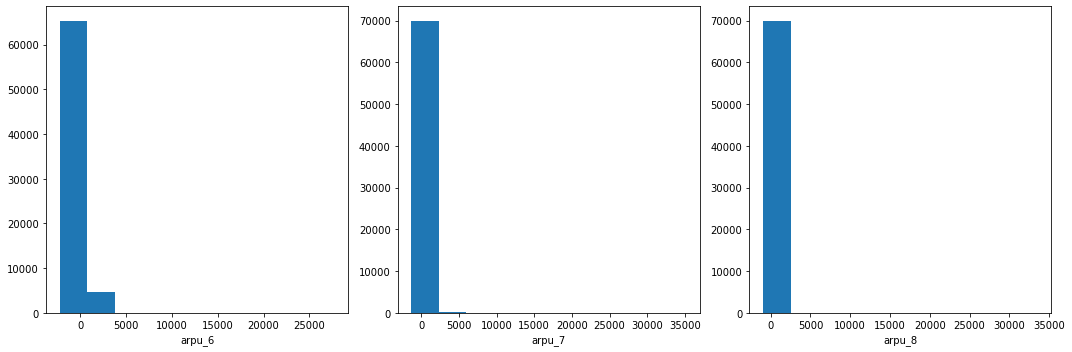

In [43]:
histPlot_monthly("arpu")

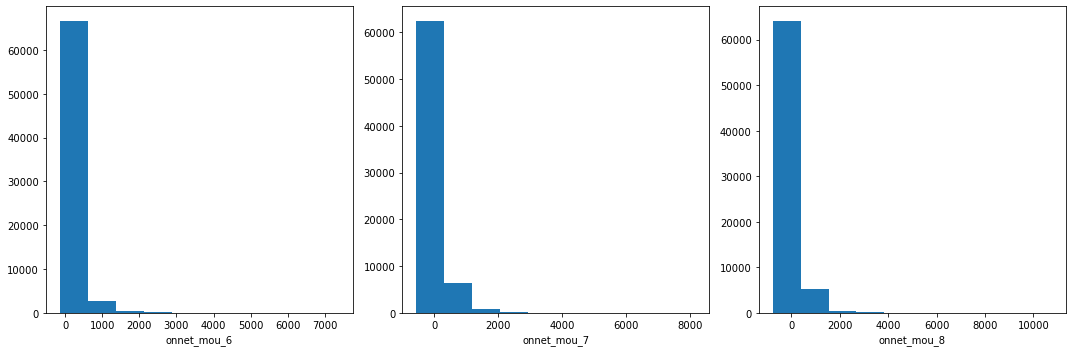

In [44]:
histPlot_monthly("onnet_mou")

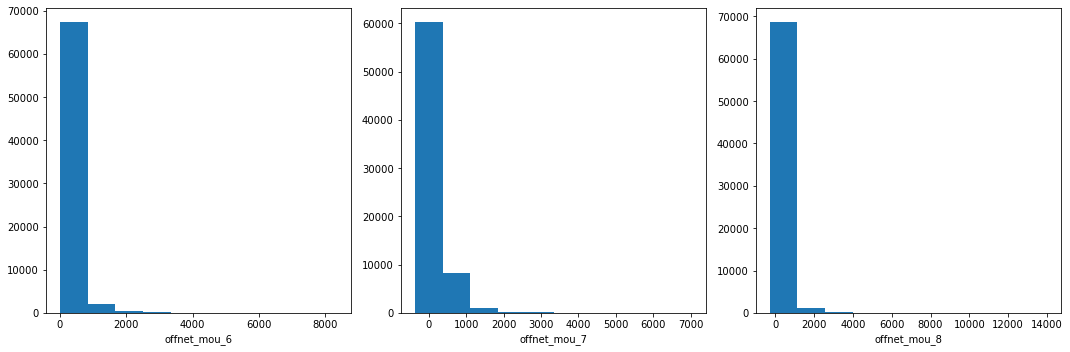

In [45]:
histPlot_monthly("offnet_mou")

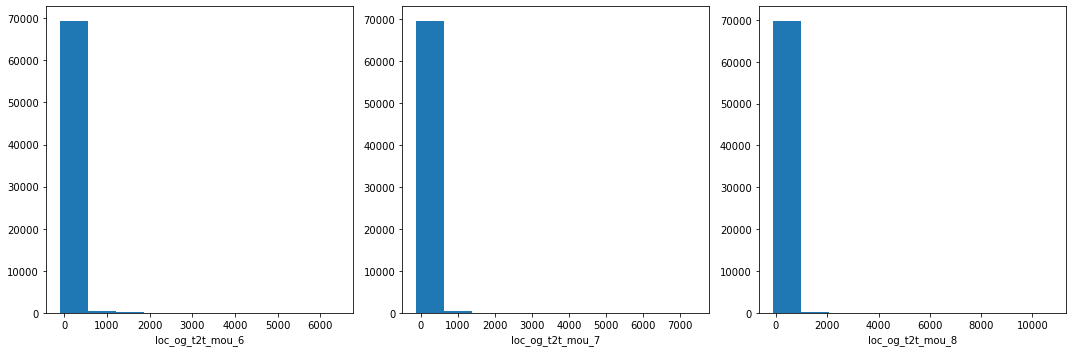

In [46]:
histPlot_monthly("loc_og_t2t_mou")

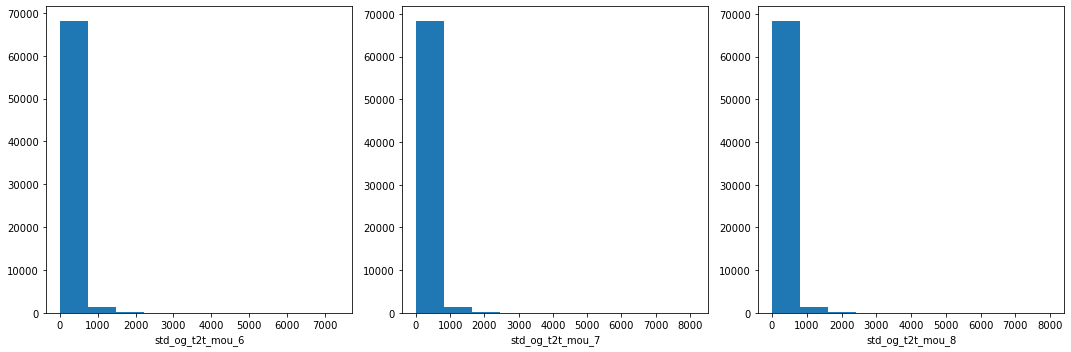

In [47]:
histPlot_monthly("std_og_t2t_mou")

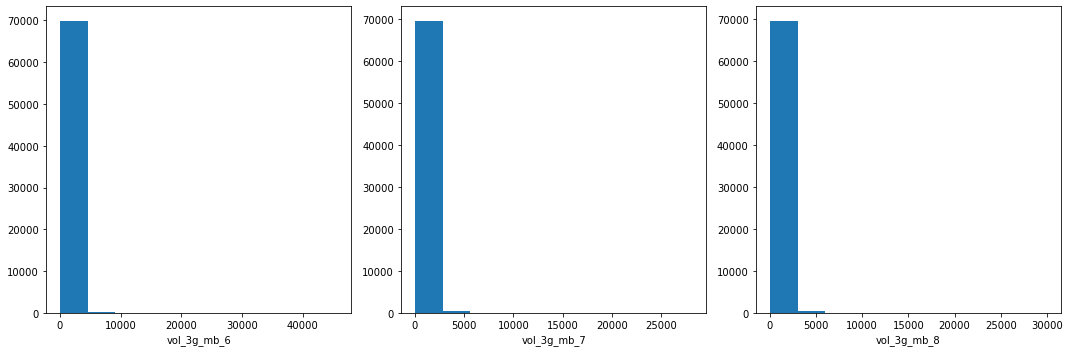

In [48]:
histPlot_monthly("vol_3g_mb")

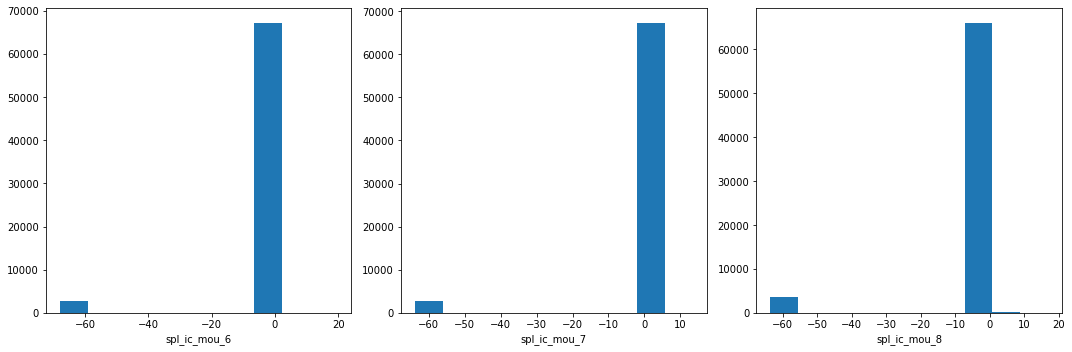

In [49]:
histPlot_monthly("spl_ic_mou")

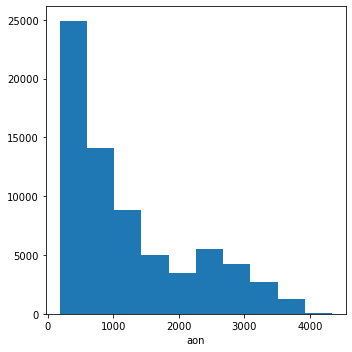

In [50]:
histPlot("aon")

#### Observations
- No significant observation is obvious from histogram plots
- Only aon columns is showing data distribution, all other columns showing grouping around 0 values

#### Plotting Categorical variables

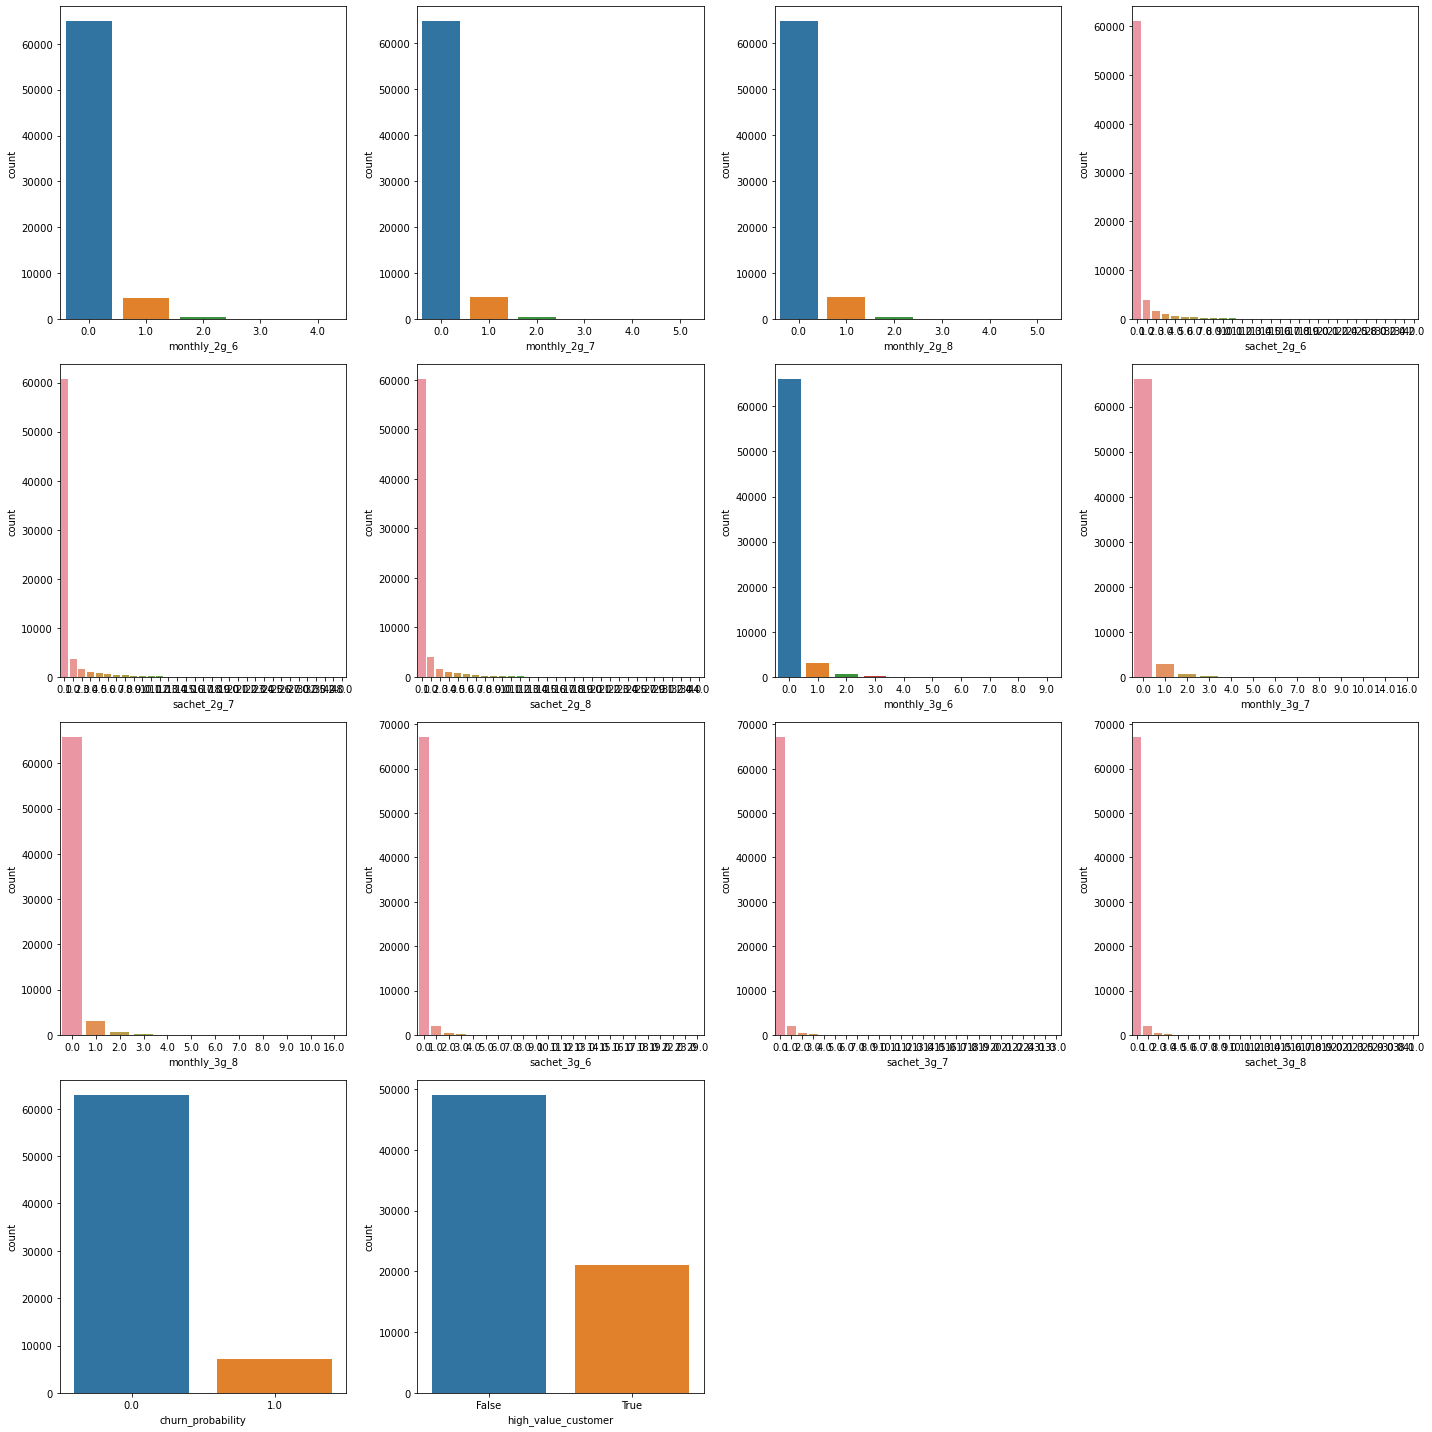

In [51]:
plt.figure(figsize=(20, 20))

plotCounter = 1
for col in category_cols[:16]:
    plt.subplot(4, 4, plotCounter)
    sns.countplot(x = dataset[col])
    plt.xlabel(col)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

#### Observations
- Most category columns have lot of data around 0
- We have High non-churn customers, than churn customers
- High value customers plot is showing significant difference in categories

#### Bivariate Analysis

<AxesSubplot:xlabel='total_og_mou_6', ylabel='total_og_mou_7'>

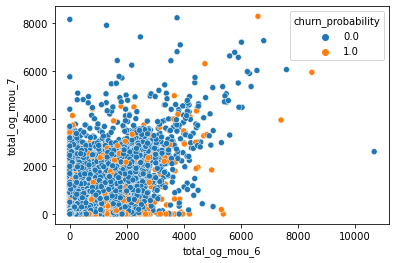

In [52]:
# total_og_mou_6 vs total_og_mou_7 with respect to churn_probability
sns.scatterplot(x=dataset['total_og_mou_6'], y=dataset['total_og_mou_7'],hue=dataset['churn_probability'])

<AxesSubplot:xlabel='total_og_mou_7', ylabel='total_og_mou_8'>

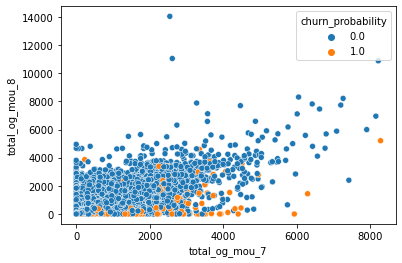

In [53]:
# total_og_mou_7 vs total_og_mou_8 with respect to churn_probability
sns.scatterplot(x=dataset['total_og_mou_7'], y=dataset['total_og_mou_8'],hue=dataset['churn_probability'])

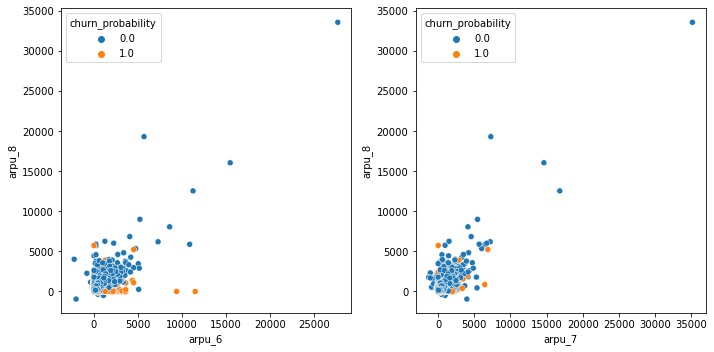

In [54]:
# 'arpu_6', 'arpu_7', 'arpu_8'  with respect to churn_probability
plt.figure(figsize=(10, 5))
cols = ['arpu_6', 'arpu_7']

plotCounter = 1
for col in cols[:2]:
    plt.subplot(1, 2, plotCounter)
    sns.scatterplot(x=dataset[col], y=dataset['arpu_8'],hue=dataset['churn_probability'])
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

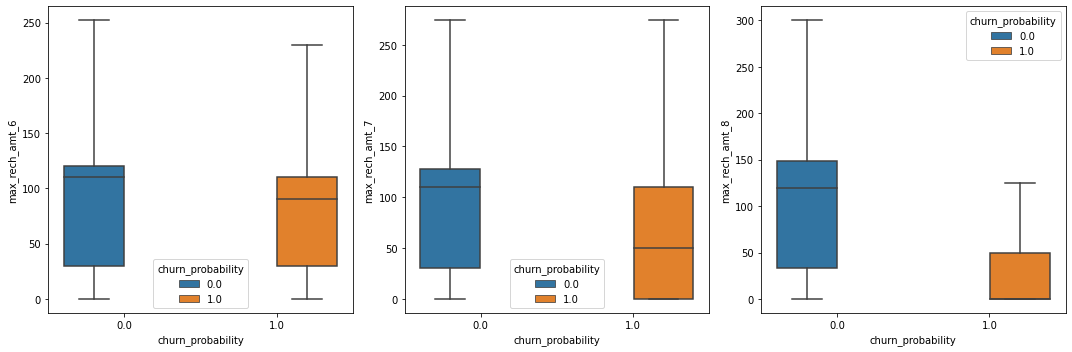

In [55]:
# 'max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'  with respect to churn_probability
plt.figure(figsize=(15, 5))
cols = ['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8']

plotCounter = 1
for col in cols:
    plt.subplot(1, 3, plotCounter)
    sns.boxplot(data=dataset, y=col,x="churn_probability",hue="churn_probability", showfliers=False)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

From above, we can see Churn customers Max_Recharge_Amount reduced significantly in 7th (mean) and 8th month

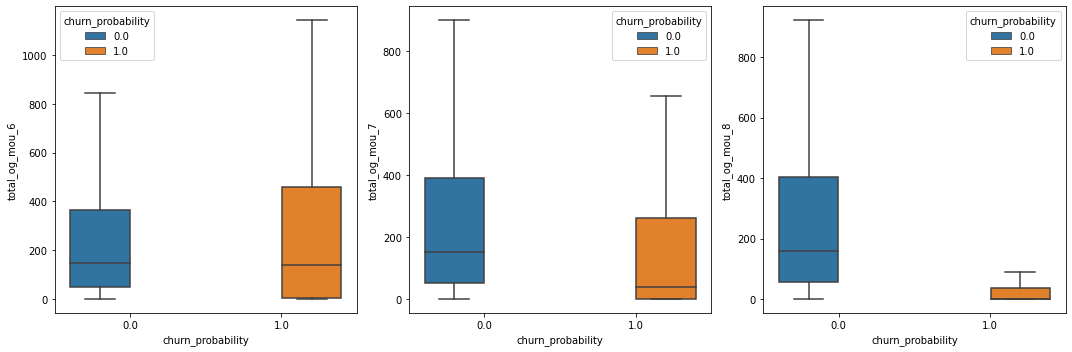

In [56]:
# 'total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8'  with respect to churn_probability
plt.figure(figsize=(15, 5))
cols = ['total_og_mou_6', 'total_og_mou_7', 'total_og_mou_8']

plotCounter = 1
for col in cols:
    plt.subplot(1, 3, plotCounter)
    sns.boxplot(data=dataset, y=col,x="churn_probability",hue="churn_probability", showfliers=False)
    plotCounter = plotCounter + 1

plt.tight_layout()
plt.show()

From above, we can see Churn customers total_outgoing_minutes_of_usage reduced significantly in 8th month

#### Corelated features

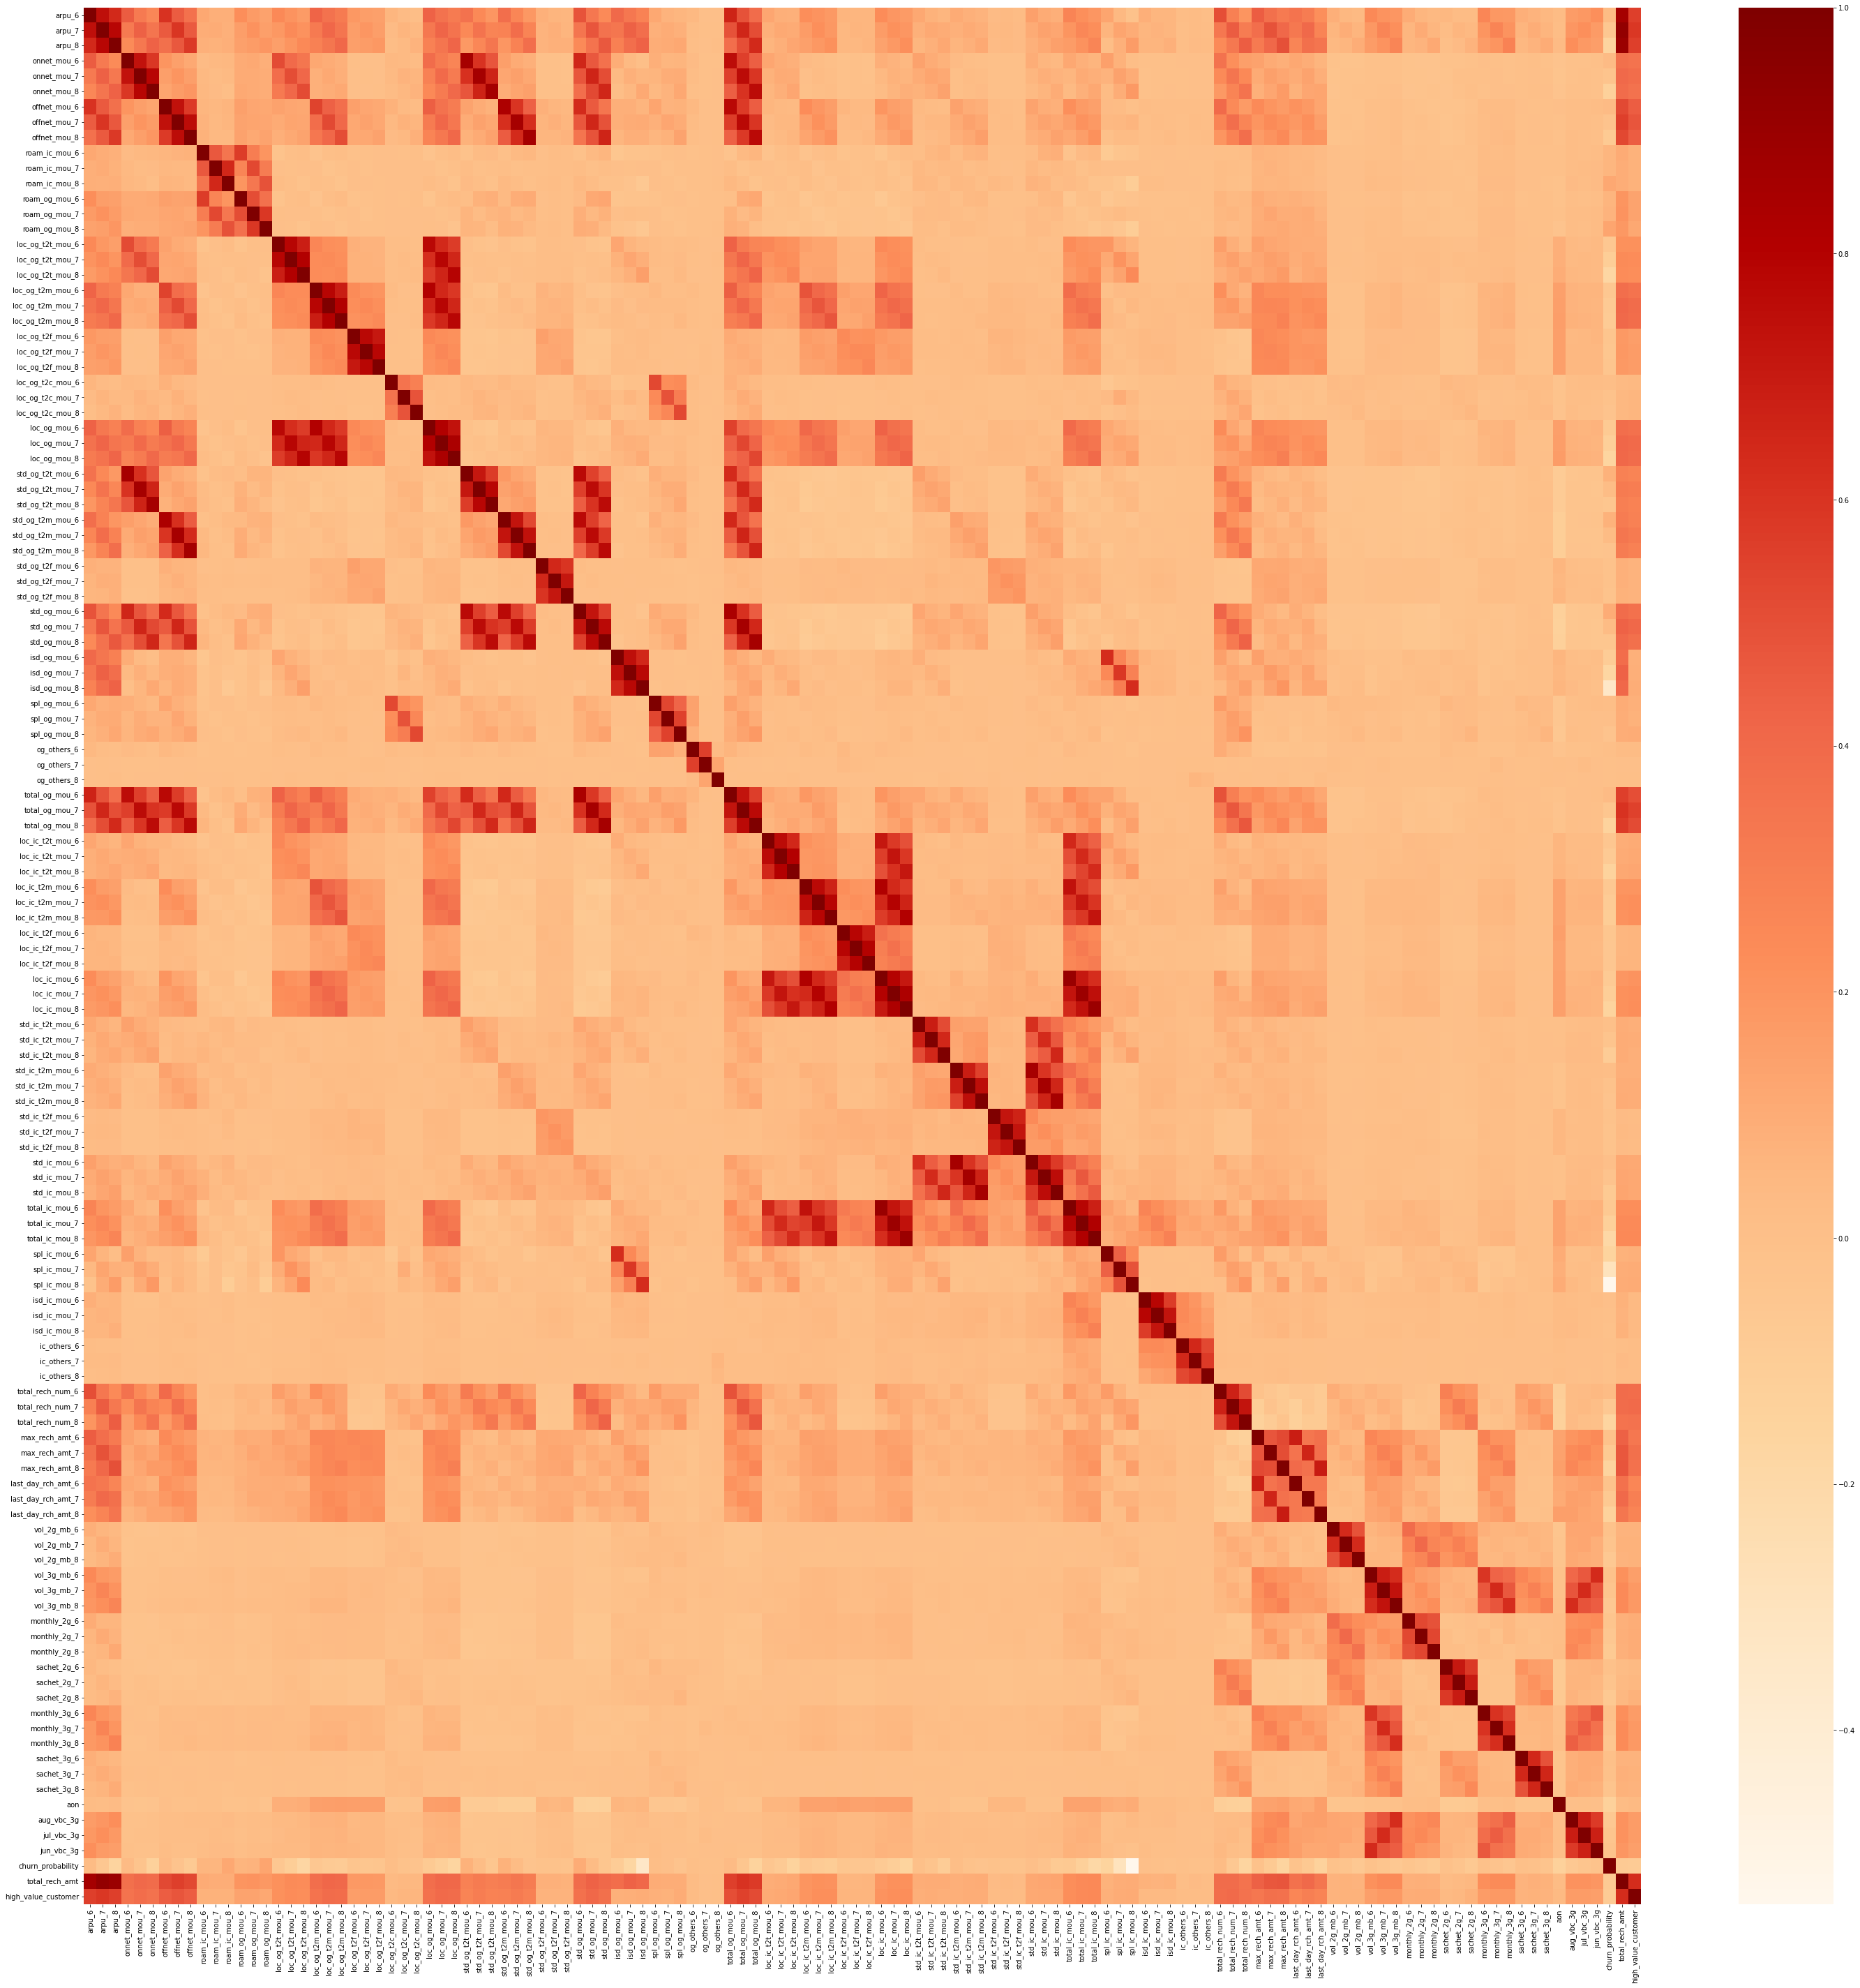

In [57]:
# plot correlation graph
plt.figure(figsize = (50, 50))

sns.heatmap(dataset.corr(), cmap="OrRd", annot = False)
plt.show()

#### Observations
- Few variables are corelated
- Because we have lot of variables, building monthly heatmaps will bring more value

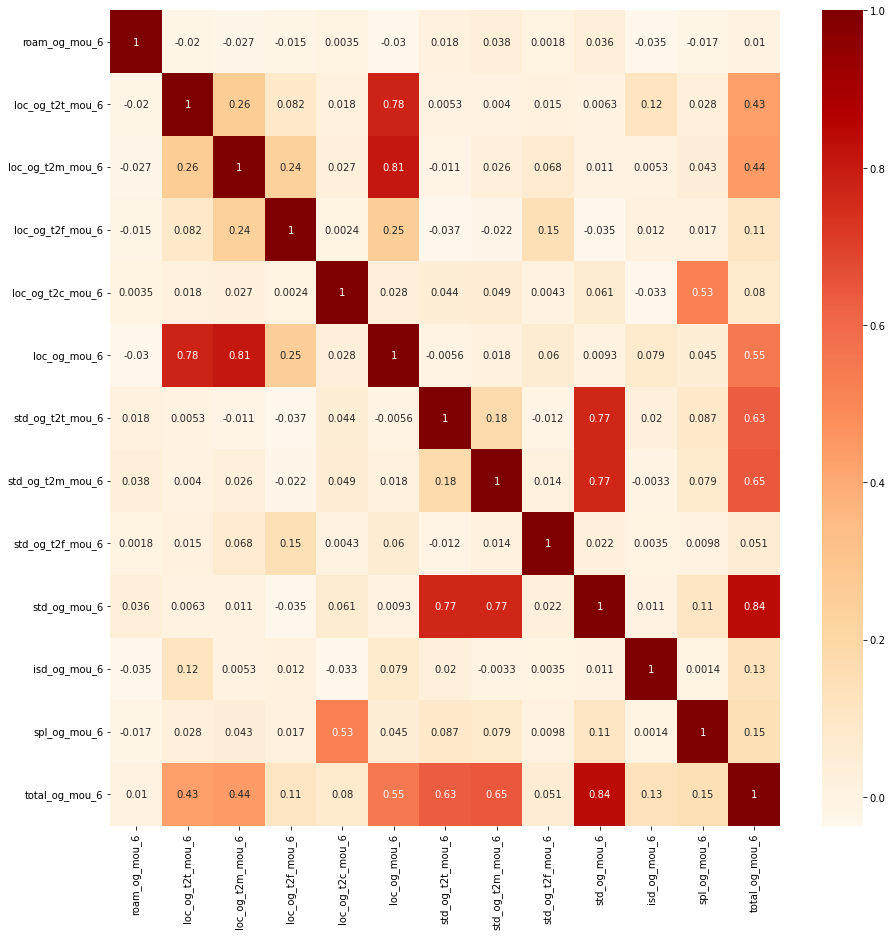

In [58]:
# plot correlation graph for June month data outgoing call columns
plt.figure(figsize = (15, 15))

june_og_columns = dataset.columns[dataset.columns.str.contains('.*_og_.*mou_6',regex=True)]
filteredDataset = dataset.filter(june_og_columns)

sns.heatmap(filteredDataset.corr(), cmap="OrRd", annot = True)
plt.show()

#### Observations
- total_og_mou_6, std_og_mou_6, loc_og_mou_6 are correlated feature

In [59]:
# Observed correlated columns can be dropped
# Same columns for 7th and 8th month can also be dropped
column_names_to_drop = ['total_og_mou_6','std_og_mou_6','loc_og_mou_6',
                        'total_og_mou_7','std_og_mou_7','loc_og_mou_7',
                        'total_og_mou_8','std_og_mou_8','loc_og_mou_8']
print('Columns to drop: ', column_names_to_drop)
dataset.drop(column_names_to_drop, axis = 1, inplace=True)
columns_dropped += column_names_to_drop
dataset.shape

Columns to drop:  ['total_og_mou_6', 'std_og_mou_6', 'loc_og_mou_6', 'total_og_mou_7', 'std_og_mou_7', 'loc_og_mou_7', 'total_og_mou_8', 'std_og_mou_8', 'loc_og_mou_8']


(69999, 115)

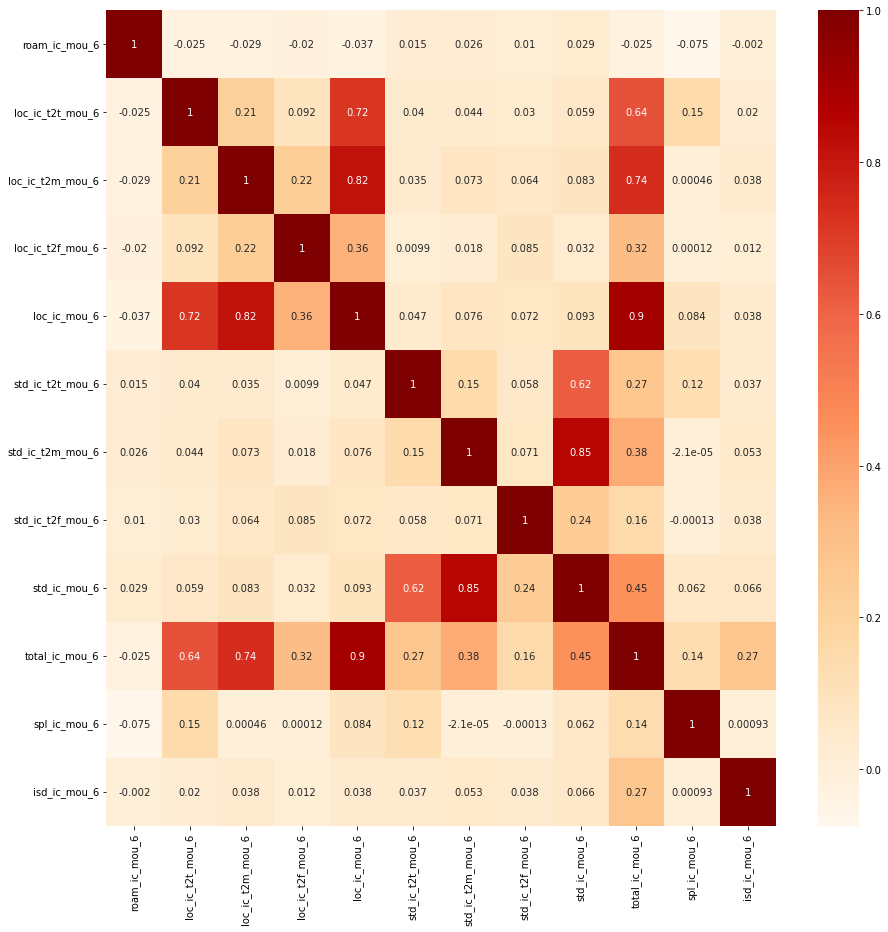

In [60]:
# plot correlation graph for June month data incoming call columns
plt.figure(figsize = (15, 15))

june_ic_columns = dataset.columns[dataset.columns.str.contains('.*_ic_.*mou_6',regex=True)]
filteredDataset = dataset.filter(june_ic_columns)

sns.heatmap(filteredDataset.corr(), cmap="OrRd", annot = True)
plt.show()

#### Observations
- total_ic_mou_6, std_ic_mou_6, loc_ic_mou_6 are correlated feature

In [61]:
# Observed correlated columns can be dropped
# Same columns for 7th and 8th month can also be dropped
column_names_to_drop = ['total_ic_mou_6','std_ic_mou_6','loc_ic_mou_6',
                        'total_ic_mou_7','std_ic_mou_7','loc_ic_mou_7',
                        'total_ic_mou_8','std_ic_mou_8','loc_ic_mou_8']
print('Columns to drop: ', column_names_to_drop)
dataset.drop(column_names_to_drop, axis = 1, inplace=True)
columns_dropped += column_names_to_drop
dataset.shape

Columns to drop:  ['total_ic_mou_6', 'std_ic_mou_6', 'loc_ic_mou_6', 'total_ic_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'total_ic_mou_8', 'std_ic_mou_8', 'loc_ic_mou_8']


(69999, 106)

##### Checkpoint - 2

In [62]:
# Lets store this imputed dataset back in a csv file, as imputation took about 20 minutes on my laptop
# dataset.to_csv('dataset_c2.csv', index=False)

In [63]:
# print(columns_dropped)

['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_og_mou_6', 'std_og_mou_6', 'loc_og_mo

In [123]:
# Code will support rerun from this point, to skip all above calculations.
# Code loads the last saved csv file and start from here again
# To start again from this checkpoint, just uncomment below lines

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
# dataset = pd.read_csv("dataset_c2.csv")
# columns_dropped = ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_og_mou_6', 'std_og_mou_6', 'loc_og_mou_6', 'total_og_mou_7', 'std_og_mou_7', 'loc_og_mou_7', 'total_og_mou_8', 'std_og_mou_8', 'loc_og_mou_8', 'total_ic_mou_6', 'std_ic_mou_6', 'loc_ic_mou_6', 'total_ic_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'total_ic_mou_8', 'std_ic_mou_8', 'loc_ic_mou_8']


#### Grouping categories and Creating Dummy Variables

In [124]:
# We observed a lot of categories data points are mostly close to 0
# so we can group low occuring categories items together
category_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8']

for col in category_columns : 
    category_counts = 100 * dataset[col].value_counts(normalize=True)
    categories_with_low_count = category_counts[category_counts <= 1].index.to_list()
    print('Replaced', categories_with_low_count, 'in ', col, 'with category: other')
    dataset[col].replace(categories_with_low_count, 'other', inplace=True)

Replaced [2.0, 3.0, 4.0] in  monthly_2g_6 with category: other
Replaced [2.0, 3.0, 4.0, 5.0] in  monthly_2g_7 with category: other
Replaced [2.0, 3.0, 4.0, 5.0] in  monthly_2g_8 with category: other
Replaced [4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 16.0, 17.0, 19.0, 22.0, 18.0, 21.0, 20.0, 25.0, 30.0, 28.0, 42.0, 24.0, 32.0, 34.0] in  sachet_2g_6 with category: other
Replaced [5.0, 6.0, 7.0, 8.0, 10.0, 9.0, 11.0, 12.0, 14.0, 13.0, 15.0, 16.0, 19.0, 18.0, 17.0, 20.0, 23.0, 22.0, 21.0, 27.0, 26.0, 32.0, 35.0, 24.0, 30.0, 25.0, 48.0, 42.0] in  sachet_2g_7 with category: other
Replaced [5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 11.0, 12.0, 14.0, 13.0, 16.0, 15.0, 17.0, 18.0, 20.0, 19.0, 24.0, 22.0, 29.0, 23.0, 21.0, 32.0, 27.0, 25.0, 31.0, 44.0, 34.0] in  sachet_2g_8 with category: other
Replaced [2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0] in  monthly_3g_6 with category: other
Replaced [3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 16.0, 14.0, 10.0] in  monthly_3g_7 with category: other
R

In [125]:
# Convert all categorical columns into categorical data type.
category_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 
                    'high_value_customer']

dataset[category_columns] = dataset[category_columns].astype('category')

dataset.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 106 columns):
 #    Column               Dtype   
---   ------               -----   
 0    arpu_6               float64 
 1    arpu_7               float64 
 2    arpu_8               float64 
 3    onnet_mou_6          float64 
 4    onnet_mou_7          float64 
 5    onnet_mou_8          float64 
 6    offnet_mou_6         float64 
 7    offnet_mou_7         float64 
 8    offnet_mou_8         float64 
 9    roam_ic_mou_6        float64 
 10   roam_ic_mou_7        float64 
 11   roam_ic_mou_8        float64 
 12   roam_og_mou_6        float64 
 13   roam_og_mou_7        float64 
 14   roam_og_mou_8        float64 
 15   loc_og_t2t_mou_6     float64 
 16   loc_og_t2t_mou_7     float64 
 17   loc_og_t2t_mou_8     float64 
 18   loc_og_t2m_mou_6     float64 
 19   loc_og_t2m_mou_7     float64 
 20   loc_og_t2m_mou_8     float64 
 21   loc_og_t2f_mou_6     float64 
 22   loc_og_t2f_mou_7    

In [126]:
# Create Dummy variables for all categorical columns
category_columns = ['monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8', 
                    'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 
                    'monthly_3g_6', 'monthly_3g_7', 'monthly_3g_8', 
                    'sachet_3g_6', 'sachet_3g_7', 'sachet_3g_8', 
                    'high_value_customer']

for col in category_columns:
    datasetCol = pd.get_dummies(dataset[col], prefix = col, drop_first=True)
    dataset = pd.concat([dataset, datasetCol], axis = 1)
    dataset.drop(col, axis = 1, inplace = True)

dataset.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8_1.0,monthly_3g_8_2.0,monthly_3g_8_other,sachet_3g_6_1.0,sachet_3g_6_other,sachet_3g_7_1.0,sachet_3g_7_other,sachet_3g_8_1.0,sachet_3g_8_other,high_value_customer_True
0,31.277,87.009,7.527,48.58,124.38,1.29,32.24,96.68,2.33,0.00,...,0,0,0,0,0,0,0,0,0,0
1,0.000,122.787,42.953,0.00,0.00,0.00,0.00,25.99,30.89,0.00,...,0,0,0,0,0,0,0,0,0,0
2,60.806,103.176,0.000,0.53,15.93,0.00,53.99,82.05,0.00,0.00,...,0,0,0,0,0,0,0,0,0,0
3,156.362,205.260,111.095,7.26,16.01,0.00,68.76,78.48,50.23,0.00,...,0,0,0,0,0,0,0,0,0,0
4,240.708,128.191,101.565,21.28,4.83,6.13,56.99,38.11,9.63,53.64,...,0,0,0,0,0,1,0,0,0,0


In [127]:
# Find out new dummy variabels datatype
dataset.info(verbose = 1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69999 entries, 0 to 69998
Data columns (total 128 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    arpu_6                    float64
 1    arpu_7                    float64
 2    arpu_8                    float64
 3    onnet_mou_6               float64
 4    onnet_mou_7               float64
 5    onnet_mou_8               float64
 6    offnet_mou_6              float64
 7    offnet_mou_7              float64
 8    offnet_mou_8              float64
 9    roam_ic_mou_6             float64
 10   roam_ic_mou_7             float64
 11   roam_ic_mou_8             float64
 12   roam_og_mou_6             float64
 13   roam_og_mou_7             float64
 14   roam_og_mou_8             float64
 15   loc_og_t2t_mou_6          float64
 16   loc_og_t2t_mou_7          float64
 17   loc_og_t2t_mou_8          float64
 18   loc_og_t2m_mou_6          float64
 19   loc_og_t2m_mou_7          float64
 20   loc_

#### Split the dataset into train and test

In [128]:
# import required libraries
import sklearn 
from sklearn.model_selection import train_test_split

In [129]:
# split dataset into train and test (70:30 ratio)
y = dataset['churn_probability']
X = dataset.drop('churn_probability', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 39)
print('X_train - ', X_train.shape)
print('X_test  - ', X_test.shape)
print('y_train - ', y_train.shape)
print('y_test  - ', y_test.shape)

X_train -  (48999, 127)
X_test  -  (21000, 127)
y_train -  (48999,)
y_test  -  (21000,)


#### Class Imbalance

In [130]:
# We must have equal samples for the target variable in the dataset,
# Lets look at if we have class imbalance in our dataset

dataset['churn_probability'].value_counts()

0.0    62867
1.0     7132
Name: churn_probability, dtype: int64

In [131]:
# We only have 7132 rows out of 69999 that belong to Churn category and about 90% of data belong to non-chrun category.
# We need to increase our samples, so that both classes have same number of samples

# Using Oversampling technique to generate synthetic data

In [132]:
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {} \n'.format(y_train.shape))
  
print("Before OverSampling, counts of label '1': {}".format(sum(y_train == 1)))
print("Before OverSampling, counts of label '0': {}".format(sum(y_train == 0)))

Before OverSampling, the shape of X_train: (48999, 127)
Before OverSampling, the shape of y_train: (48999,) 

Before OverSampling, counts of label '1': 5037
Before OverSampling, counts of label '0': 43962


In [133]:
!pip3 install imblearn --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user
import imblearn
from imblearn.over_sampling import SMOTE

In [134]:
sm = SMOTE(random_state = 39)
X_train_updated, y_train_updated = sm.fit_resample(X_train, y_train.ravel())

In [135]:
print('After OverSampling, the shape of X_train: {}'.format(X_train_updated.shape))
print('After OverSampling, the shape of y_train: {} \n'.format(y_train_updated.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_updated == 1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_updated == 0)))

After OverSampling, the shape of X_train: (87924, 127)
After OverSampling, the shape of y_train: (87924,) 

After OverSampling, counts of label '1': 43962
After OverSampling, counts of label '0': 43962


Class imbalance problem is now resolved, we have equal amount of rows for both churn and non-churn customers

#### Data Scaling

In [136]:
# Import required libraries
from sklearn.preprocessing import MinMaxScaler

In [137]:
numeric_columns = X_train.select_dtypes(include='float64').columns
print(numeric_columns)

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6',
       'roam_og_mou_7', 'roam_og_mou_8', 'loc_og_t2t_mou_6',
       'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6',
       'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6',
       'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6',
       'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'std_og_t2t_mou_6',
       'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6',
       'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6',
       'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'isd_og_mou_6', 'isd_og_mou_7',
       'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8',
       'og_others_6', 'og_others_7', 'og_others_8', 'loc_ic_t2t_mou_6',
       'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6',
       'loc_ic_t2m_mou_7', 'loc_ic_t

In [138]:
# Scale all numeric columns using Min Max Scaler

scaler = MinMaxScaler()
X_train[numeric_columns] = scaler.fit_transform(X_train[numeric_columns])
X_test[numeric_columns] = scaler.transform(X_test[numeric_columns])
X_train.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,...,monthly_3g_8_1.0,monthly_3g_8_2.0,monthly_3g_8_other,sachet_3g_6_1.0,sachet_3g_6_other,sachet_3g_7_1.0,sachet_3g_7_other,sachet_3g_8_1.0,sachet_3g_8_other,high_value_customer_True
22286,0.075422,0.096213,0.075756,0.058442,0.077522,0.089376,0.045493,0.165896,0.116532,0.011639,...,0,0,0,0,0,0,0,0,0,1
6824,0.088638,0.088128,0.029733,0.035825,0.072616,0.056733,0.150270,0.114210,0.031825,0.011639,...,0,0,0,0,0,0,0,0,0,0
53068,0.055980,0.082386,0.036453,0.019295,0.069898,0.066435,0.008318,0.067082,0.025952,0.011639,...,0,0,0,0,0,0,0,0,0,0
61339,0.058124,0.080948,0.034725,0.018223,0.068028,0.066435,0.000172,0.050299,0.020701,0.011639,...,0,0,0,0,1,0,0,0,0,0
47815,0.065353,0.081563,0.050872,0.018433,0.070447,0.071283,0.006259,0.069572,0.044508,0.011639,...,0,0,0,0,0,0,0,0,0,0


##### Checkpoint - 3

In [140]:
# Lets store this imputed dataset back in a csv file, as imputation took about 20 minutes on my laptop
# dataset.to_csv('dataset_c3.csv', index=False)

In [141]:
# Code will support rerun from this point, to skip all above calculations.
# Code loads the last saved csv file and start from here again
# To start again from this checkpoint, just uncomment below lines

# import pandas as pd
# import numpy as np
# import matplotlib.pyplot as plt
# import seaborn as sns
# import warnings
# warnings.filterwarnings('ignore')
# import sklearn 
# from sklearn.model_selection import train_test_split
# dataset = pd.read_csv("dataset_c3.csv")
# columns_dropped = ['id', 'circle_id', 'loc_og_t2o_mou', 'std_og_t2o_mou', 'loc_ic_t2o_mou', 'last_date_of_month_6', 'last_date_of_month_7', 'last_date_of_month_8', 'std_og_t2c_mou_6', 'std_og_t2c_mou_7', 'std_og_t2c_mou_8', 'std_ic_t2o_mou_6', 'std_ic_t2o_mou_7', 'std_ic_t2o_mou_8', 'date_of_last_rech_6', 'date_of_last_rech_7', 'date_of_last_rech_8', 'date_of_last_rech_data_6', 'date_of_last_rech_data_7', 'date_of_last_rech_data_8', 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'max_rech_data_6', 'max_rech_data_7', 'max_rech_data_8', 'count_rech_2g_6', 'count_rech_2g_7', 'count_rech_2g_8', 'count_rech_3g_6', 'count_rech_3g_7', 'count_rech_3g_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'arpu_3g_6', 'arpu_3g_7', 'arpu_3g_8', 'arpu_2g_6', 'arpu_2g_7', 'arpu_2g_8', 'night_pck_user_6', 'night_pck_user_7', 'night_pck_user_8', 'fb_user_6', 'fb_user_7', 'fb_user_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8', 'total_og_mou_6', 'std_og_mou_6', 'loc_og_mou_6', 'total_og_mou_7', 'std_og_mou_7', 'loc_og_mou_7', 'total_og_mou_8', 'std_og_mou_8', 'loc_og_mou_8', 'total_ic_mou_6', 'std_ic_mou_6', 'loc_ic_mou_6', 'total_ic_mou_7', 'std_ic_mou_7', 'loc_ic_mou_7', 'total_ic_mou_8', 'std_ic_mou_8', 'loc_ic_mou_8']


### Model Building, Model Selection, and Prediction

Lets build multiple models to predict Churn Probability, and check performance of each model.

In [443]:
# Creating a table which contain all the metrics
score_table = {'Metric': [ 
    'Accuracy (Train)', 'Sensitivity/ Recall (Train)', 'Specificity (Train)', 'Precision (Train)', 'F1-score (Train)',
    'Accuracy (Test)', 'Sensitivity/ Recall (Test)', 'Specificity (Test)', 'Precision (Test)', 'F1-score (Test)']}
score_metric = pd.DataFrame(score_table)
score_metric = pd.concat([score_metric], axis = 1)

In [444]:
# Define support function to calculate metrics on a model
import math
from sklearn.metrics import confusion_matrix

def calculate_proba_model_metrics(proba_cutoff, X_train, X_test, y_train, y_train_pred, y_test, y_test_pred) :
    
    y_train_pred_series = pd.Series(y_train_pred[:,1], index = X_train.index)
    y_test_pred_series = pd.Series(y_test_pred[:,1], index = X_test.index)
    
    model_metrics = []
    
    y_train_pred_classified = y_train_pred_series.map(lambda x : 1 if x > proba_cutoff else 0)
    y_test_pred_classified = y_test_pred_series.map(lambda x : 1 if x > proba_cutoff else 0)
    
    train_confusion_matrix = confusion_matrix(y_train, y_train_pred_classified)
    test_confusion_matrix = confusion_matrix(y_test, y_test_pred_classified)
    
    train_scores = calculate_scores(train_confusion_matrix)
    for score in train_scores:
        model_metrics.append(score)
    
    test_scores = calculate_scores(test_confusion_matrix)
    for score in test_scores:
        model_metrics.append(score)
    
    return model_metrics

def calculate_model_metrics(y_train, y_train_pred, y_test, y_test_pred) :    
    model_metrics = []
    
    train_confusion_matrix = confusion_matrix(y_train, y_train_pred)
    test_confusion_matrix = confusion_matrix(y_test, y_test_pred)
    
    train_scores = calculate_scores(train_confusion_matrix)
    for score in train_scores:
        model_metrics.append(score)
    
    test_scores = calculate_scores(test_confusion_matrix)
    for score in test_scores:
        model_metrics.append(score)
    
    return model_metrics

def calculate_scores(input_confusion_matrix) :
    scores = []
    
    TN = input_confusion_matrix[0][0]
    TP = input_confusion_matrix[1][1]
    FP = input_confusion_matrix[0][1]
    FN = input_confusion_matrix[1][0]
    
    accuracy = round((TP + TN)/float(TP+TN+FP+FN),3)
    scores.append(accuracy)
    
    sensitivity = round(TP/float(FN + TP),3)
    scores.append(sensitivity)
    
    specificity = round(TN/float(TN + FP),3)
    scores.append(specificity)
    
    precision = round(TP/float(TP + FP),3)
    scores.append(precision)
    
    f1Score = round(2*precision*sensitivity/(precision + sensitivity),3)
    scores.append(f1Score)
    
    return scores

def print_scores(model_name, scores) :
    print('Model - ', model_name)
    print('\nTrain scores :', 
          '\nAccuracy                                  :', scores[0], 
          '\nSensitivity / True Positive Rate / Recall :', scores[1], 
          '\nSpecificity / True Negative Rate          :', scores[2], 
          '\nPrecision / Positive Predictive Value     :', scores[3], 
          '\nF1-score                                  :', scores[4])
    print('\nTest scores :', 
          '\nAccuracy                                  :', scores[5], 
          '\nSensitivity / True Positive Rate / Recall :', scores[6], 
          '\nSpecificity / True Negative Rate          :', scores[7], 
          '\nPrecision / Positive Predictive Value     :', scores[8], 
          '\nF1-score                                  :', scores[9])

def find_optimal_cutoff(X_train, y_train, y_train_pred) :
    thresholds = [float(x)/10 for x in range(10)]
    
    y_train_pred_series = pd.Series(y_train_pred[:,1], index = X_train.index)
    
    cutoff_df = pd.DataFrame(columns=['prob', 'accuracy', 'sensitivity', 'specificity'])
    
    for cutOff in thresholds:
        y_train_pred_series_mapped = y_train_pred_series.map(lambda x: 1 if x > cutOff else 0)

        cm = confusion_matrix(y_train, y_train_pred_series_mapped)
        scores = calculate_scores(cm)
        
        cutoff_df.loc[cutOff] =[cutOff ,scores[0], scores[1], scores[2]]      

    cutoff_df.plot.line(x='prob', y=['accuracy', 'sensitivity', 'specificity'])
    plt.show()

#### Logistic Regression Model

In [445]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=39)
lr = lr.fit(X_train, y_train)

y_train_pred_lr = lr.predict_proba(X_train)
y_test_pred_lr  = lr.predict_proba(X_test)

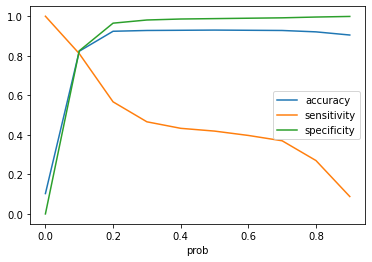

In [446]:
find_optimal_cutoff(X_train, y_train, y_train_pred_lr)

In [447]:
# From above graph 0.1 is optimal cutoff
metric_lr = calculate_proba_model_metrics(0.1, X_train, X_test, y_train, y_train_pred_lr, y_test, y_test_pred_lr)
print_scores('Logistic Regression', metric_lr)
lr_metric = pd.Series(metric_lr, name = 'Logistic Regression')
score_metric = pd.concat([score_metric, lr_metric], axis = 1)

Model -  Logistic Regression

Train scores : 
Accuracy                                  : 0.823 
Sensitivity / True Positive Rate / Recall : 0.811 
Specificity / True Negative Rate          : 0.825 
Precision / Positive Predictive Value     : 0.346 
F1-score                                  : 0.485

Test scores : 
Accuracy                                  : 0.826 
Sensitivity / True Positive Rate / Recall : 0.811 
Specificity / True Negative Rate          : 0.827 
Precision / Positive Predictive Value     : 0.342 
F1-score                                  : 0.481


#### Logistic Regression with RFE Model

In [448]:
from sklearn.feature_selection import RFE

lr = LogisticRegression(random_state=39)
rfe = RFE(estimator=lr, n_features_to_select=15)
rfe_results = rfe.fit(X_train, y_train)

In [449]:
# DataFrame with features supported by RFE
rfe_support = pd.DataFrame({'Column' : X.columns.to_list(), 'Rank' : rfe_results.ranking_, 
                                      'Support' :  rfe_results.support_}).sort_values(by=
                                       'Rank', ascending=True)
rfe_support

,Column,Rank,Support
13,roam_og_mou_7,1,True
30,std_og_t2m_mou_6,1,True
86,vol_3g_mb_8,1,True
20,loc_og_t2m_mou_8,1,True
83,vol_2g_mb_8,1,True
...,...,...,...
98,sachet_2g_6_1.0,109,False
69,ic_others_6,110,False
43,og_others_7,111,False
102,sachet_2g_7_1.0,112,False


In [450]:
# RFE Selected columns
rfe_selected_columns = rfe_support.loc[rfe_support['Rank'] == 1,'Column'].to_list()
rfe_selected_columns

['roam_og_mou_7',
 'std_og_t2m_mou_6',
 'vol_3g_mb_8',
 'loc_og_t2m_mou_8',
 'vol_2g_mb_8',
 'last_day_rch_amt_8',
 'max_rech_amt_8',
 'total_rech_num_8',
 'roam_og_mou_8',
 'std_og_t2t_mou_6',
 'onnet_mou_8',
 'spl_ic_mou_8',
 'loc_ic_t2f_mou_8',
 'loc_ic_t2m_mou_8',
 'offnet_mou_8']

In [451]:
lr_with_rfe = LogisticRegression(random_state=39)
lr_with_rfe = lr_with_rfe.fit(X_train[rfe_selected_columns], y_train)

y_train_pred_lr_rfe = lr_with_rfe.predict_proba(X_train[rfe_selected_columns])
y_test_pred_lr_rfe  = lr_with_rfe.predict_proba(X_test[rfe_selected_columns])

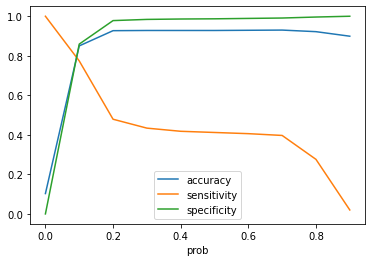

In [452]:
find_optimal_cutoff(X_train, y_train, y_train_pred_lr_rfe)

In [453]:
# From above graph 0.1 is optimal cutoff
metric_lr_with_rfe = calculate_proba_model_metrics(0.1, X_train, X_test, y_train, y_train_pred_lr_rfe, y_test, y_test_pred_lr_rfe)
print_scores('Logistic Regression With RFE', metric_lr_with_rfe)
lr_with_rfe_metric = pd.Series(metric_lr_with_rfe, name = 'Logistic Regression With RFE')
score_metric = pd.concat([score_metric, lr_with_rfe_metric], axis = 1)

Model -  Logistic Regression With RFE

Train scores : 
Accuracy                                  : 0.85 
Sensitivity / True Positive Rate / Recall : 0.774 
Specificity / True Negative Rate          : 0.859 
Precision / Positive Predictive Value     : 0.386 
F1-score                                  : 0.515

Test scores : 
Accuracy                                  : 0.852 
Sensitivity / True Positive Rate / Recall : 0.779 
Specificity / True Negative Rate          : 0.86 
Precision / Positive Predictive Value     : 0.381 
F1-score                                  : 0.512


#### Decision Tree Model

In [483]:
!pip install six

In [484]:
# Import required libraries
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image  
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

In [485]:
# Define function that is used multiple times
def get_tree_graph(tree, columns) :
    dot_data = StringIO()
    export_graphviz(tree, out_file=dot_data, filled=True, rounded=True,
                    feature_names=columns, 
                    class_names=['No Churn', "Churn"])

    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
    return graph

In [486]:
dt = DecisionTreeClassifier(max_depth=3, random_state=39)
dt.fit(X_train, y_train)

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

DecisionTreeClassifier(max_depth=3, random_state=39)

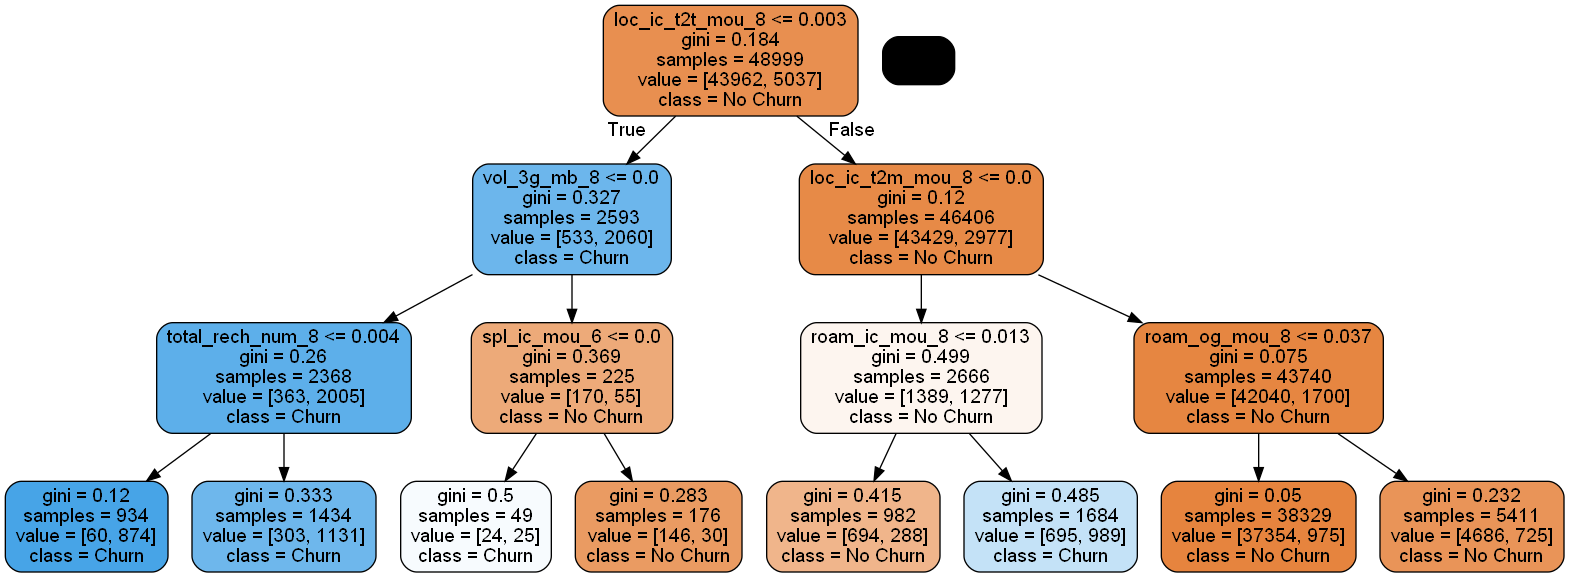

In [487]:
graph = get_tree_graph(dt, X.columns)
Image(graph.create_png())

In [489]:
metric_dt = calculate_model_metrics(y_train, y_train_pred_dt, y_test, y_test_pred_dt)
print_scores('Decision Tree', metric_dt)
dt_metric = pd.Series(metric_dt, name = 'Decision Tree')
score_metric = pd.concat([score_metric, dt_metric], axis = 1)

Model -  Decision Tree

Train scores : 
Accuracy                                  : 0.937 
Sensitivity / True Positive Rate / Recall : 0.599 
Specificity / True Negative Rate          : 0.975 
Precision / Positive Predictive Value     : 0.736 
F1-score                                  : 0.66

Test scores : 
Accuracy                                  : 0.938 
Sensitivity / True Positive Rate / Recall : 0.598 
Specificity / True Negative Rate          : 0.976 
Precision / Positive Predictive Value     : 0.731 
F1-score                                  : 0.658


#### Decision Tree Model with Hyper-parameter tuning

In [495]:
# Import required libraries
from sklearn.model_selection import GridSearchCV

In [496]:
dt = DecisionTreeClassifier(random_state=39)

# Tune model on below parameters
params = {
    'max_depth': [2, 3, 5, 10],
    'min_samples_leaf': [20, 50, 100],
    'min_samples_split': [20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [498]:
# Grid Search will build multiple models and find the best one based on scoring method
# using recall as scoring method
grid_search = GridSearchCV(estimator=dt, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 72 candidates, totalling 288 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=39), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10],
                         'min_samples_leaf': [20, 50, 100],
                         'min_samples_split': [20, 50, 100]},
             scoring='recall', verbose=1)

In [499]:
score_df = pd.DataFrame(grid_search.cv_results_)
score_df.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,mean_test_score,std_test_score,rank_test_score
0,2.303261,0.027451,0.100695,0.016381,gini,2,20,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.397935,0.405083,0.396032,0.393963,0.398253,0.004186,64
1,2.399043,0.073506,0.111213,0.027016,gini,2,20,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.397935,0.405083,0.396032,0.393963,0.398253,0.004186,64
2,2.356841,0.049365,0.097769,0.008610,gini,2,20,100,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.397935,0.405083,0.396032,0.393963,0.398253,0.004186,64
3,2.361046,0.145266,0.083906,0.006404,gini,2,50,20,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.397935,0.405083,0.396032,0.393963,0.398253,0.004186,64
4,2.225115,0.038096,0.076791,0.004595,gini,2,50,50,"{'criterion': 'gini', 'max_depth': 2, 'min_sam...",0.397935,0.405083,0.396032,0.393963,0.398253,0.004186,64


In [500]:
grid_search.best_estimator_

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=50,
                       min_samples_split=20, random_state=39)

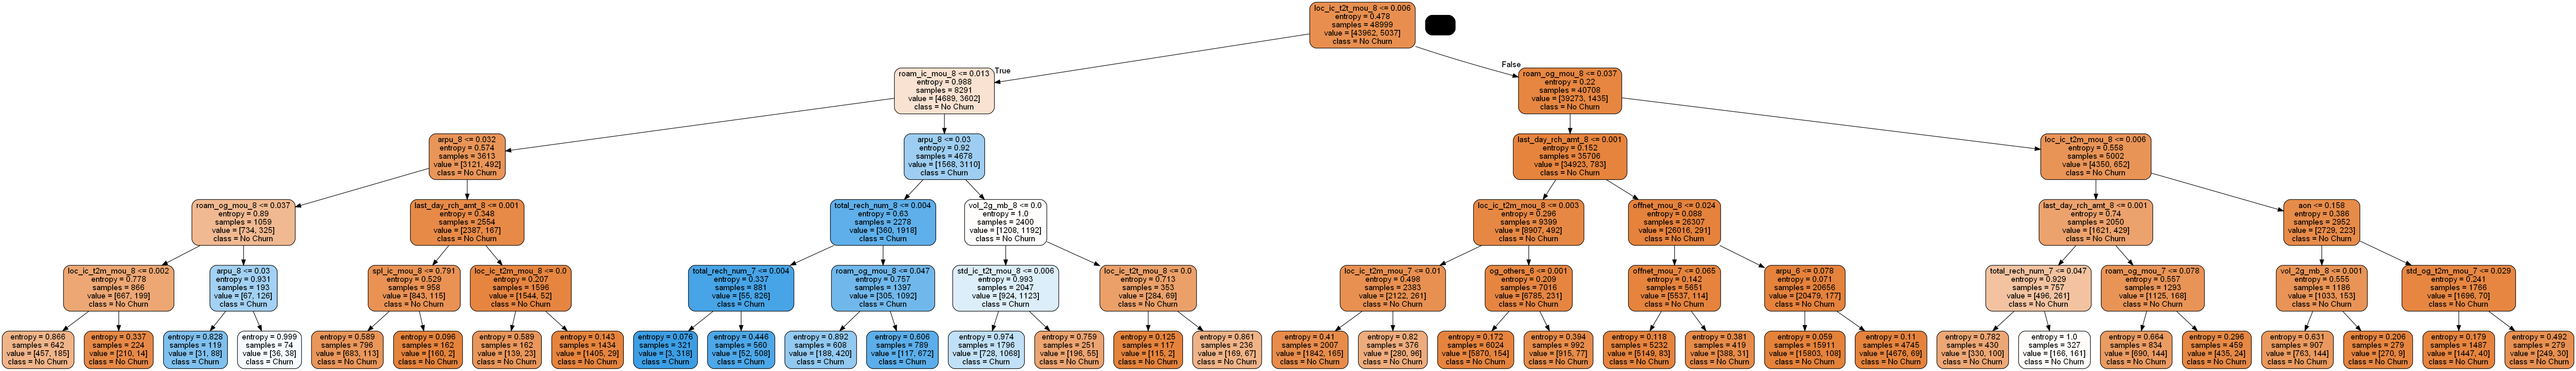

In [515]:
# Build decision tree using best estimated parameters
dt_tuned = DecisionTreeClassifier(max_depth=5,min_samples_leaf=50,min_samples_split=20,criterion="entropy",random_state=39)
dt_tuned.fit(X_train, y_train)

y_train_pred_dt_tuned = dt_tuned.predict(X_train)
y_test_pred_dt_tuned = dt_tuned.predict(X_test)

graph = get_tree_graph(dt_tuned, X.columns)
Image(graph.create_png())

In [503]:
metric_dt_tuned = calculate_model_metrics(y_train, y_train_pred_dt_tuned, y_test, y_test_pred_dt_tuned)
print_scores('Decision Tree Tuned', metric_dt_tuned)
dt_tuned_metric = pd.Series(metric_dt_tuned, name = 'Decision Tree Tuned')
score_metric = pd.concat([score_metric, dt_tuned_metric], axis = 1)

Model -  Decision Tree Tuned

Train scores : 
Accuracy                                  : 0.937 
Sensitivity / True Positive Rate / Recall : 0.618 
Specificity / True Negative Rate          : 0.974 
Precision / Positive Predictive Value     : 0.729 
F1-score                                  : 0.669

Test scores : 
Accuracy                                  : 0.94 
Sensitivity / True Positive Rate / Recall : 0.631 
Specificity / True Negative Rate          : 0.974 
Precision / Positive Predictive Value     : 0.729 
F1-score                                  : 0.676


#### Random Forest Model

In [505]:
# Import required libraries
from sklearn.ensemble import RandomForestClassifier

In [506]:
rf = RandomForestClassifier(random_state=39, n_estimators=10, max_depth=3)
rf.fit(X_train, y_train)

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

RandomForestClassifier(max_depth=3, n_estimators=10, random_state=39)

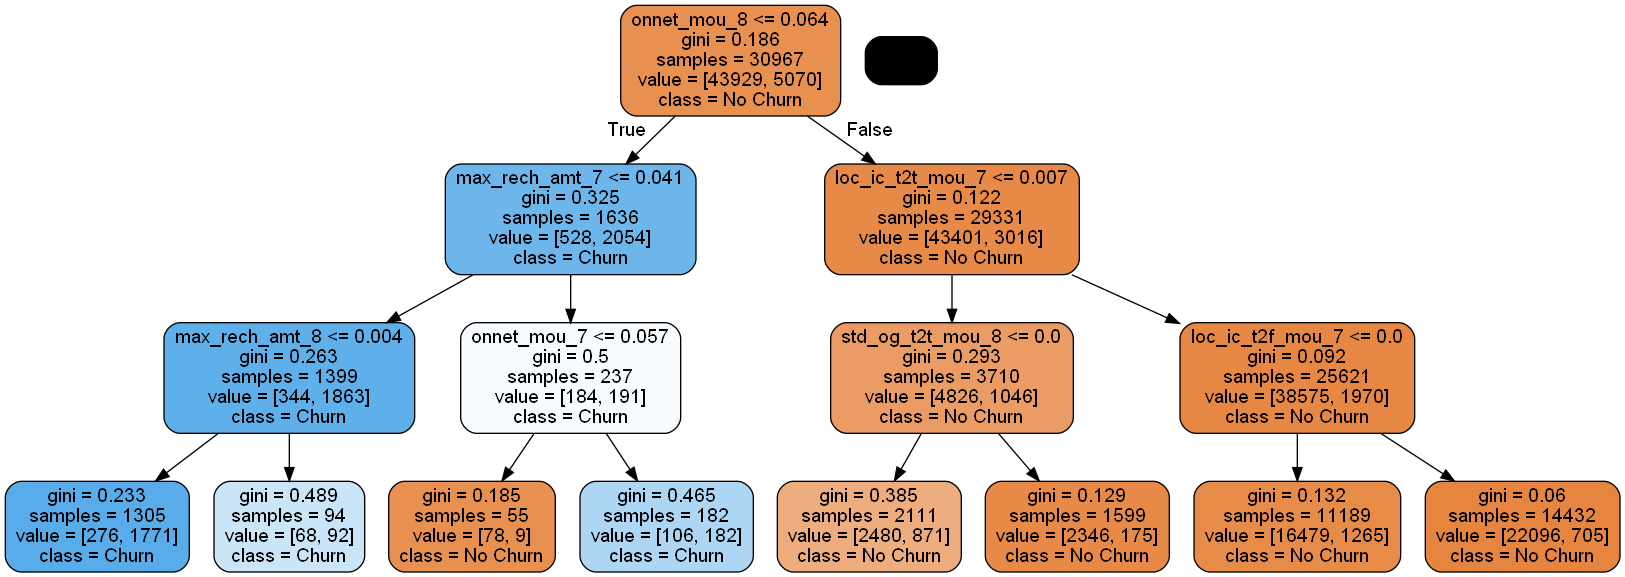

In [519]:
# we have 10 estimators, Plot first graph
# Graph_0
gph = get_tree_graph(rf.estimators_[0], X.columns)
Image(gph.create_png())

In [525]:
metric_rf = calculate_model_metrics(y_train, y_train_pred_rf, y_test, y_test_pred_rf)
print_scores('Random Forest', metric_rf)
rf_metric = pd.Series(metric_rf, name = 'Random Forest')
score_metric = pd.concat([score_metric, rf_metric], axis = 1)

Model -  Random Forest

Train scores : 
Accuracy                                  : 0.93 
Sensitivity / True Positive Rate / Recall : 0.403 
Specificity / True Negative Rate          : 0.991 
Precision / Positive Predictive Value     : 0.832 
F1-score                                  : 0.543

Test scores : 
Accuracy                                  : 0.933 
Sensitivity / True Positive Rate / Recall : 0.41 
Specificity / True Negative Rate          : 0.991 
Precision / Positive Predictive Value     : 0.837 
F1-score                                  : 0.55


#### Random Forest Model with Hyper-parameter tuning

In [526]:
# Import required libraries
from sklearn.model_selection import GridSearchCV

In [532]:
rf = RandomForestClassifier(random_state=39)

# Tune model on below parameters
params = {
    'max_depth': [10,15,20],
    'min_samples_leaf': [20, 50, 100],
    'max_features': [4,5],
    'n_estimators': [20, 50]
}

In [533]:
# Grid Search will build multiple models and find the best one based on scoring method
# using recall as scoring method
grid_search = GridSearchCV(estimator=rf, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "recall")

grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 36 candidates, totalling 144 fits


GridSearchCV(cv=4, estimator=RandomForestClassifier(random_state=39), n_jobs=-1,
             param_grid={'max_depth': [10, 15, 20], 'max_features': [4, 5],
                         'min_samples_leaf': [20, 50, 100],
                         'n_estimators': [20, 50]},
             scoring='recall', verbose=1)

In [534]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=20, max_features=5, min_samples_leaf=20,
                       n_estimators=50, random_state=39)

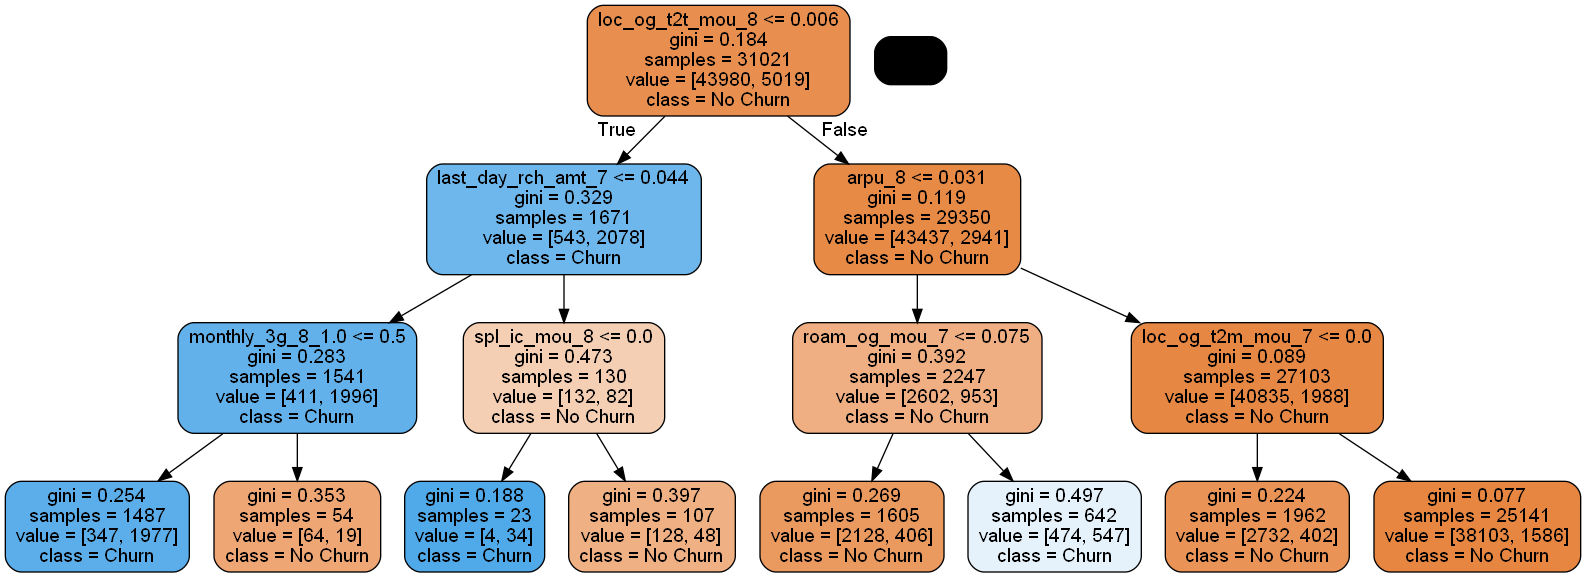

In [535]:
# Build Random forest using best estimated parameters
rf_tuned = RandomForestClassifier(random_state=39,max_depth=20,min_samples_leaf=20,max_features=5,n_estimators=50)
rf_tuned.fit(X_train, y_train)

y_train_pred_rf_tuned = rf_tuned.predict(X_train)
y_test_pred_rf_tuned = rf_tuned.predict(X_test)

graph = get_tree_graph(rf_tuned.estimators_[0], X.columns)
Image(gph.create_png())

In [537]:
metric_rf_tuned = calculate_model_metrics(y_train, y_train_pred_rf_tuned, y_test, y_test_pred_rf_tuned)
print_scores('Random Forest Tuned', metric_rf_tuned)
rf_tuned_metric = pd.Series(metric_rf_tuned, name = 'Random Forest Tuned')
score_metric = pd.concat([score_metric, rf_tuned_metric], axis = 1)

Model -  Random Forest Tuned

Train scores : 
Accuracy                                  : 0.944 
Sensitivity / True Positive Rate / Recall : 0.58 
Specificity / True Negative Rate          : 0.985 
Precision / Positive Predictive Value     : 0.819 
F1-score                                  : 0.679

Test scores : 
Accuracy                                  : 0.942 
Sensitivity / True Positive Rate / Recall : 0.567 
Specificity / True Negative Rate          : 0.983 
Precision / Positive Predictive Value     : 0.788 
F1-score                                  : 0.659


In [544]:
# Find important variables
pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": rf_tuned.feature_importances_
}).sort_values(by="Imp", ascending=False).head(15)

,Varname,Imp
47,loc_ic_t2t_mou_8,0.090165
17,loc_og_t2t_mou_8,0.063007
2,arpu_8,0.057977
5,onnet_mou_8,0.053713
11,roam_ic_mou_8,0.052735
14,roam_og_mou_8,0.049602
65,spl_ic_mou_8,0.049168
20,loc_og_t2m_mou_8,0.034439
56,std_ic_t2t_mou_8,0.034375
77,max_rech_amt_8,0.029973


#### Adaboost Model

In [545]:
# Import required libraries
from sklearn.ensemble import AdaBoostClassifier

In [546]:
adaboost =  AdaBoostClassifier(n_estimators=200, random_state=39)
adaboost.fit(X_train, y_train)

y_train_pred_adaboost = adaboost.predict(X_train)
y_test_pred_adaboost = adaboost.predict(X_test)

In [547]:
metric_adaboost = calculate_model_metrics(y_train, y_train_pred_adaboost, y_test, y_test_pred_adaboost)
print_scores('Adaboost', metric_adaboost)
adaboost_metric = pd.Series(metric_adaboost, name = 'Adaboost')
score_metric = pd.concat([score_metric, adaboost_metric], axis = 1)

Model -  Adaboost

Train scores : 
Accuracy                                  : 0.939 
Sensitivity / True Positive Rate / Recall : 0.614 
Specificity / True Negative Rate          : 0.976 
Precision / Positive Predictive Value     : 0.749 
F1-score                                  : 0.675

Test scores : 
Accuracy                                  : 0.939 
Sensitivity / True Positive Rate / Recall : 0.601 
Specificity / True Negative Rate          : 0.977 
Precision / Positive Predictive Value     : 0.741 
F1-score                                  : 0.664


#### XGboost Model

In [549]:
# Import required libraries
!pip3 install xgboost --trusted-host pypi.org --trusted-host pypi.python.org --trusted-host files.pythonhosted.org --user
import xgboost as xgb

In [551]:
xgboost = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')
xgboost.fit(X_train, y_train)

y_train_pred_xgboost = xgboost.predict(X_train)
y_test_pred_xgboost = xgboost.predict(X_test)

In [552]:
metric_xgboost = calculate_model_metrics(y_train, y_train_pred_xgboost, y_test, y_test_pred_xgboost)
print_scores('XGboost', metric_xgboost)
xgboost_metric = pd.Series(metric_xgboost, name = 'XGboost')
score_metric = pd.concat([score_metric, xgboost_metric], axis = 1)

Model -  XGboost

Train scores : 
Accuracy                                  : 0.982 
Sensitivity / True Positive Rate / Recall : 0.866 
Specificity / True Negative Rate          : 0.995 
Precision / Positive Predictive Value     : 0.953 
F1-score                                  : 0.907

Test scores : 
Accuracy                                  : 0.951 
Sensitivity / True Positive Rate / Recall : 0.64 
Specificity / True Negative Rate          : 0.985 
Precision / Positive Predictive Value     : 0.826 
F1-score                                  : 0.721


#### XGBoost with tuning

In [554]:
# Import required libraries
from sklearn.model_selection import RandomizedSearchCV

In [559]:
xgboost = xgb.XGBClassifier(n_jobs = -1,objective = 'binary:logistic')

# Tune model on below parameters
params = {
        'n_estimators' : [50, 100],
        'learning_rate' : [0.02, 0.05, 0.1],
        'min_child_weight': [5, 7, 10],
        'max_depth': [3, 5, 10]
        }

In [ ]:
random_search = RandomizedSearchCV(xgboost, 
                                   param_distributions=params, 
                                   n_iter=50,
                                   scoring='recall', 
                                   n_jobs=-1, cv=4, verbose=1, random_state=39)

random_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


In [ ]:
random_search.best_estimator_

In [ ]:
# Build XG Boost with best parameters
xgboost_tuned = xgb.XGBClassifier(n_jobs=-1,objective='binary:logistic',n_estimators=5,
                                  learning_rate=0.01,min_child_weight=1,
                                  colsample_bytree=0.6,max_depth=10)
xgboost_tuned.fit(X_train, y_train)

y_train_pred_xgboost_tuned = xgboost_tuned.predict(X_train)
y_test_pred_xgboost_tuned = xgboost_tuned.predict(X_test)

In [ ]:
metric_xgboost_tuned = calculate_model_metrics(y_train, y_train_pred_xgboost_tuned, y_test, y_test_pred_xgboost_tuned)
print_scores('XGboost Tuned', metric_xgboost_tuned)
xgboost_tuned_metric = pd.Series(metric_xgboost_tuned, name = 'XGboost Tuned')
score_metric = pd.concat([score_metric, xgboost_tuned_metric], axis = 1)

In [ ]:
# Find important variables
pd.DataFrame({
    "Varname": X_train.columns,
    "Imp": xgboost_tuned.feature_importances_
}).sort_values(by="Imp", ascending=False).head(15)

#### PCA with XG Boost

In [ ]:
# Import required libraries
from sklearn.decomposition import PCA

In [ ]:
pca = PCA(random_state=39)

pca.fit(X_train) # note that pca is fit on original train set instead of resampled train set. 
pca.components_

In [553]:
score_metric

,Metric,Logistic Regression,Logistic Regression With RFE,Decision Tree,Decision Tree,Decision Tree Tuned,Decision Tree,Decision Tree Tuned,Random Forest,Random Forest Tuned,Adaboost,XGboost
0,Accuracy (Train),0.823,0.850,0.937,0.937,0.942,0.937,0.937,0.930,0.944,0.939,0.982
1,Sensitivity/ Recall (Train),0.811,0.774,0.599,0.599,0.620,0.599,0.618,0.403,0.580,0.614,0.866
2,Specificity (Train),0.825,0.859,0.975,0.975,0.979,0.975,0.974,0.991,0.985,0.976,0.995
3,Precision (Train),0.346,0.386,0.736,0.736,0.770,0.736,0.729,0.832,0.819,0.749,0.953
4,F1-score (Train),0.485,0.515,0.660,0.660,0.687,0.660,0.669,0.543,0.679,0.675,0.907
5,Accuracy (Test),0.826,0.852,0.938,0.938,0.943,0.938,0.940,0.933,0.942,0.939,0.951
6,Sensitivity/ Recall (Test),0.811,0.779,0.598,0.598,0.624,0.598,0.631,0.410,0.567,0.601,0.640
7,Specificity (Test),0.827,0.860,0.976,0.976,0.978,0.976,0.974,0.991,0.983,0.977,0.985
8,Precision (Test),0.342,0.381,0.731,0.731,0.761,0.731,0.729,0.837,0.788,0.741,0.826
9,F1-score (Test),0.481,0.512,0.658,0.658,0.686,0.658,0.676,0.550,0.659,0.664,0.721


### Final Recommendations